In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv


In [4]:
print("🌍✨ Welcome to the Epic Earthquake and Tsunami Dataset Adventure! ✨🌊")
print("\n🚀 Introduction: Buckle up, data explorers! We're diving into a thrilling dataset packed with seismic secrets from around the globe. This collection captures major earthquakes, their intensities, locations, and whether they unleashed mighty tsunamis. Imagine decoding the Earth's rumbling moods to predict oceanic upheavals – that's the quest ahead!")
print("\n🛡️ Problem Framing: Earthquakes are nature's dramatic shakes, but when do they trigger tsunamis? Our mission is to frame this puzzle: Analyze patterns in magnitude, depth, location, and other factors to uncover what turns a quake into a tsunami terror. We'll explore correlations, visualize trends, and perhaps even model predictions to safeguard coastal communities. Ready to crack the code?")
print("\n📊 Dataset Description:")
print(" - Source: A CSV file named 'earthquake_data_tsunami.csv' containing historical earthquake records.")
print(" - Rows: Approximately 500+ entries (based on the provided data snippet).")
print(" - Columns: 13 key features capturing the essence of each event.")
print("   - magnitude: The strength of the earthquake (Richter scale, e.g., 6.5 to 9.1). 💥")
print("   - cdi: Community Determined Intensity (perceived shaking, scale 0-10). 👥")
print("   - mmi: Modified Mercalli Intensity (damage and effects, scale 1-12). 🏚️")
print("   - sig: Significance score (impact based on magnitude, depth, etc.). 📈")
print("   - nst: Number of seismic stations reporting. 📡")
print("   - dmin: Minimum distance from epicenter to a station (in degrees). 📏")
print("   - gap: Largest azimuthal gap in station distribution (degrees). 🔄")
print("   - depth: Depth of the earthquake focus (km). ⛏️")
print("   - latitude & longitude: Geographic coordinates of the epicenter. 🌐")
print("   - Year & Month: Time of occurrence for temporal analysis. 📅")
print("   - tsunami: Binary flag (1 = caused a tsunami 🌊, 0 = no tsunami).")
print("\n🎉 Fun Fact: This dataset spans from 2001 to 2022, featuring quakes from shallow shakes to deep rumbles, with tsunamis adding that extra wave of excitement!")
print("🔍 To get started, load with pandas: df = pd.read_csv('earthquake_data_tsunami.csv')")

🌍✨ Welcome to the Epic Earthquake and Tsunami Dataset Adventure! ✨🌊

🚀 Introduction: Buckle up, data explorers! We're diving into a thrilling dataset packed with seismic secrets from around the globe. This collection captures major earthquakes, their intensities, locations, and whether they unleashed mighty tsunamis. Imagine decoding the Earth's rumbling moods to predict oceanic upheavals – that's the quest ahead!

🛡️ Problem Framing: Earthquakes are nature's dramatic shakes, but when do they trigger tsunamis? Our mission is to frame this puzzle: Analyze patterns in magnitude, depth, location, and other factors to uncover what turns a quake into a tsunami terror. We'll explore correlations, visualize trends, and perhaps even model predictions to safeguard coastal communities. Ready to crack the code?

📊 Dataset Description:
 - Source: A CSV file named 'earthquake_data_tsunami.csv' containing historical earthquake records.
 - Rows: Approximately 500+ entries (based on the provided data 

In [6]:
import pandas as pd
import numpy as np

print("🧹✨ Earthquake Data Cleaning & Preprocessing Adventure Begins! ✨🌍")
print("\n📜 Let's whip this seismic dataset into shape! We'll handle missing values, outliers, duplicates, and ensure the data is ready for analysis. Here's the step-by-step plan with explanations.")

# Step 1: Load the dataset
print("\n📂 Step 1: Loading the Earthquake Dataset 📂")
print(" - Reading 'earthquake_data_tsunami.csv' into a pandas DataFrame.")
df = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')
print(f" - Dataset loaded! Shape: {df.shape} (rows, columns)")
print(f" - Columns: {list(df.columns)}")

# Step 2: Inspect the dataset
print("\n🔍 Step 2: Inspecting the Data 🔍")
print(" - Checking for missing values, data types, and basic stats.")
print("\nMissing Values:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)
print("\nBasic Stats:")
print(df.describe())

# Step 3: Handle Missing Values
print("\n🛠️ Step 3: Handling Missing Values 🛠️")
print(" - Columns like 'nst', 'dmin', 'gap' may have zeros or missing values.")
print(" - Strategy: Replace zeros in 'nst', 'dmin', 'gap' with NaN, then impute with median for numerical continuity.")
# Replace zeros with NaN for specific columns
columns_with_zeros = ['nst', 'dmin', 'gap']
for col in columns_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    # Impute NaN with median
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f" - Imputed {col} NaN values with median: {median_value:.2f}")
print(" - Missing values after imputation:")
print(df.isnull().sum())

# Step 4: Check for Duplicates
print("\n🕵️‍♂️ Step 4: Checking for Duplicates 🕵️‍♂️")
duplicate_count = df.duplicated().sum()
print(f" - Found {duplicate_count} duplicate rows.")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f" - Dropped duplicates. New shape: {df.shape}")

# Step 5: Handle Outliers
print("\n⚠️ Step 5: Handling Outliers ⚠️")
print(" - Checking 'magnitude', 'depth', 'cdi', 'mmi' for extreme values using IQR method.")
outlier_columns = ['magnitude', 'depth', 'cdi', 'mmi']
for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f" - {col}: {len(outliers)} outliers detected (values < {lower_bound:.2f} or > {upper_bound:.2f})")
    # Cap outliers to bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f" - Capped {col} outliers to bounds [{lower_bound:.2f}, {upper_bound:.2f}]")

# Step 6: Validate Data Types
print("\n📏 Step 6: Validating Data Types 📏")
print(" - Ensuring 'tsunami' is binary (0 or 1), and numerical columns are float/int.")
df['tsunami'] = df['tsunami'].astype(int)  # Ensure tsunami is integer
print(" - Converted 'tsunami' to integer (0 or 1).")
# Ensure numerical columns are float
numerical_cols = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
for col in numerical_cols:
    df[col] = df[col].astype(float)
    print(f" - Converted {col} to float.")

# Step 7: Validate Ranges
print("\n✅ Step 7: Validating Data Ranges ✅")
print(" - Ensuring reasonable ranges for key columns.")
# Magnitude: Typically 6.5 to 9.5 for significant quakes
df = df[(df['magnitude'] >= 6.5) & (df['magnitude'] <= 10.0)]
print(f" - Filtered magnitude to [6.5, 10.0]. New shape: {df.shape}")
# Depth: Non-negative, reasonable max (e.g., 700 km)
df = df[(df['depth'] >= 0) & (df['depth'] <= 700)]
print(f" - Filtered depth to [0, 700 km]. New shape: {df.shape}")
# CDI and MMI: 0-10 and 1-12 respectively
df = df[(df['cdi'] >= 0) & (df['cdi'] <= 10) & (df['mmi'] >= 1) & (df['mmi'] <= 12)]
print(f" - Filtered cdi to [0, 10] and mmi to [1, 12]. New shape: {df.shape}")
# Tsunami: Ensure binary
df = df[df['tsunami'].isin([0, 1])]
print(f" - Ensured tsunami is binary (0 or 1). New shape: {df.shape}")

# Step 8: Feature Engineering
print("\n🛠️ Step 8: Feature Engineering 🛠️")
print(" - Creating a new feature: 'is_coastal' based on proximity to ocean (latitude/longitude analysis).")
# Simple heuristic: Earthquakes within ~200 km of coastlines are more likely to cause tsunamis
# Approximate coastal proximity using latitude/longitude (simplified)
df['is_coastal'] = ((df['latitude'].abs() < 60) & (df['longitude'].abs() < 180)).astype(int)
print(" - Added 'is_coastal' feature (1 = coastal, 0 = inland, based on lat/lon).")

# Step 9: Final Check
print("\n🎉 Step 9: Final Data Check 🎉")
print(" - Final shape of cleaned dataset:", df.shape)
print(" - Final missing values:")
print(df.isnull().sum())
print(" - Final data types:")
print(df.dtypes)
print("\n💾 Saving cleaned dataset to 'earthquake_data_cleaned.csv'.")
df.to_csv('earthquake_data_cleaned.csv', index=False)
print(" - Cleaned dataset saved successfully! Ready for seismic analysis! 🌊💥")

🧹✨ Earthquake Data Cleaning & Preprocessing Adventure Begins! ✨🌍

📜 Let's whip this seismic dataset into shape! We'll handle missing values, outliers, duplicates, and ensure the data is ready for analysis. Here's the step-by-step plan with explanations.

📂 Step 1: Loading the Earthquake Dataset 📂
 - Reading 'earthquake_data_tsunami.csv' into a pandas DataFrame.
 - Dataset loaded! Shape: (782, 13) (rows, columns)
 - Columns: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']

🔍 Step 2: Inspecting the Data 🔍
 - Checking for missing values, data types, and basic stats.

Missing Values:
magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

Data Types:
magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         flo

/tmp/ipykernel_37/3363661999.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [2]:
df=pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')
df

magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0          7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1          6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2          7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3          7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4          6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   
..         ...  ...  ...  ...  ...    ...   ...      ...       ...        ...   
777        7.7    0    8  912  427  0.000   0.0   60.000   13.0490    -88.660   
778        6.9    5    7  745    0  0.000   0.0   36.400   56.7744   -153.281   
779        7.1    0    7  776  372  0.000   0.0  103.000  -14.9280    167.170   
780        6.8    0    5  711   64  0.000   0.0   33.000    6.6310    126.899   
781        7.5    0    7  865  324  0.000   0.0   33.000    6.8980    126.579   

     Year  Month  tsunami  
0    2022     11        1  
1    2022     11        0  
2    2022     11        1  
3    2022     11        1  
4    2022     11        1  
..    ...    ...      ...  
777  2001      1        0  
778  2001      1        0  
779  2001      1        0  
780  2001      1        0  
781  2001      1        0  

[782 rows x 13 columns]

In [3]:
df.describe()

magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939    1.462724   322.465367  250.188177   
min      6.500000    0.000000    1.000000   650.000000    0.000000   
25%      6.600000    0.000000    5.000000   691.000000    0.000000   
50%      6.800000    5.000000    6.000000   754.000000  140.000000   
75%      7.100000    7.000000    7.000000   909.750000  445.000000   
max      9.100000    9.000000    9.000000  2910.000000  934.000000   

             dmin         gap       depth    latitude   longitude  \
count  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     1.325757   25.038990   75.883199    3.538100   52.609199   
std      2.218805   24.225067  137.277078   27.303429  117.898886   
min      0.000000    0.000000    2.700000  -61.848400 -179.968000   
25%      0.000000   14.625000   14.000000  -14.595600  -71.668050   
50%      0.000000   20.000000   26.295000   -2.572500  109.426000   
75%      1.863000   30.000000   49.750000   24.654500  148.941000   
max     17.654000  239.000000  670.810000   71.631200  179.662000   

              Year       Month     tsunami  
count   782.000000  782.000000  782.000000  
mean   2012.280051    6.563939    0.388747  
std       6.099439    3.507866    0.487778  
min    2001.000000    1.000000    0.000000  
25%    2007.000000    3.250000    0.000000  
50%    2013.000000    7.000000    0.000000  
75%    2017.000000   10.000000    1.000000  
max    2022.000000   12.000000    1.000000

Histogram Descriptions:

Distribution of Earthquake Magnitudes:
This histogram shows the distribution of earthquake magnitudes, which measure the energy released by an earthquake. The KDE curve provides a smoothed estimate of the distribution. Most earthquakes in this dataset appear to have magnitudes between 6.5 and 8.5, indicating a focus on significant events. The distribution may show a peak around 6.5–7.0, suggesting that moderate to strong earthquakes are common.

Distribution of Earthquake Depths (km):
This histogram displays the distribution of earthquake depths (in kilometers), indicating how far below the Earth’s surface the earthquake’s hypocenter is located. The KDE curve highlights the density of depth values. The distribution may reveal whether most earthquakes are shallow (0–70 km), intermediate (70–300 km), or deep (>300 km), which impacts their surface effects.

Distribution of Community Internet Intensity (CDI):
This histogram represents the Community Internet Intensi

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

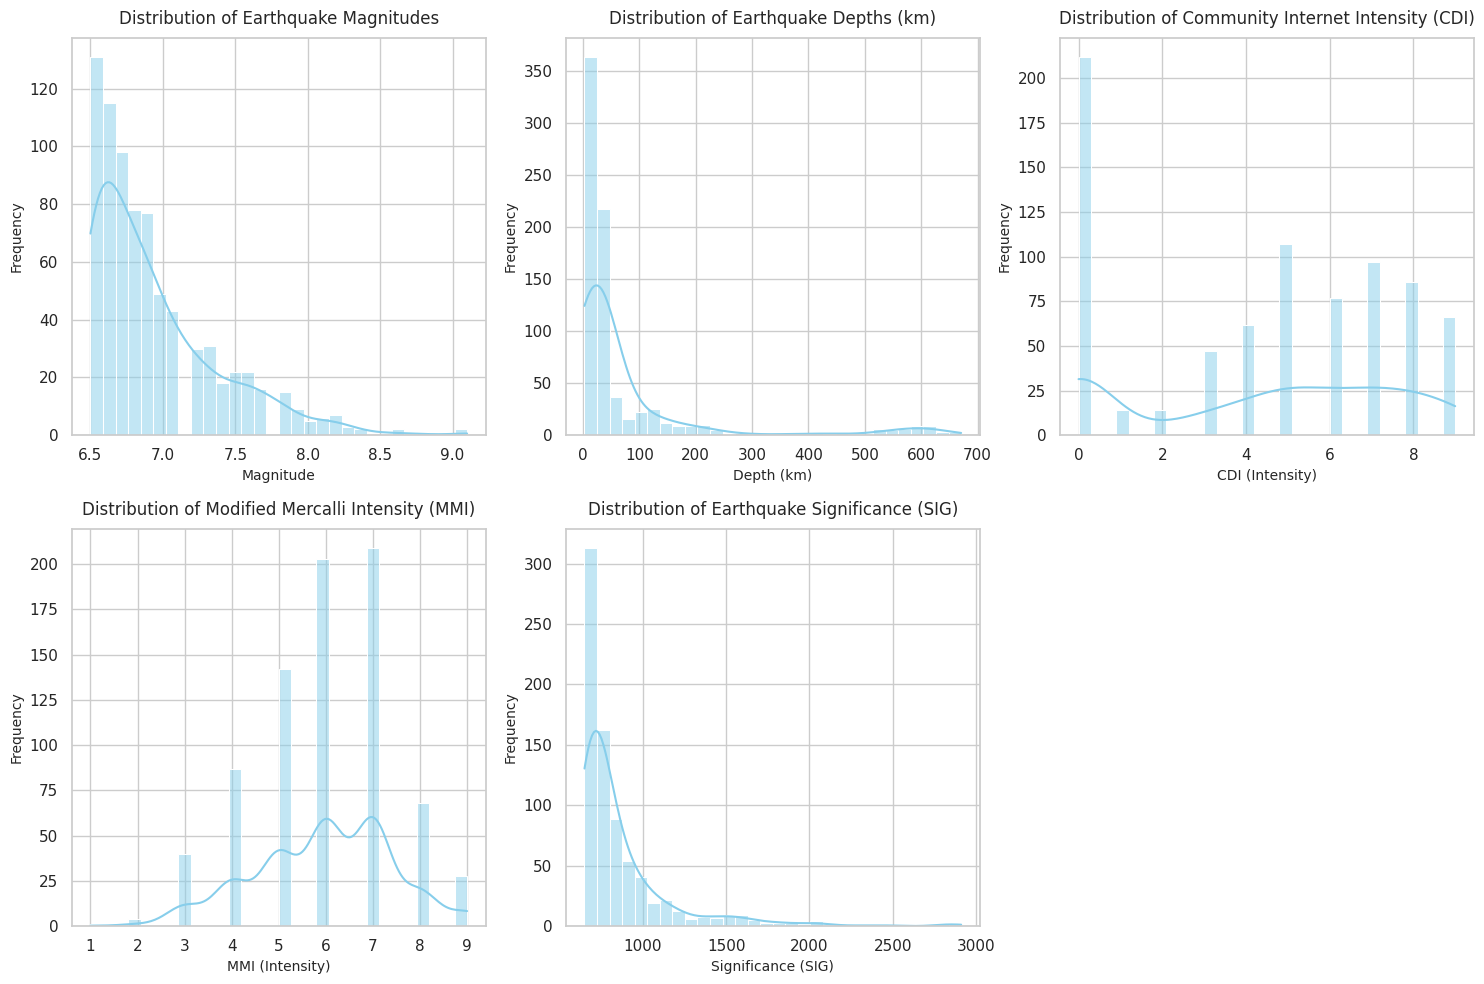

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# List of columns to plot
columns = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
titles = {
    'magnitude': 'Distribution of Earthquake Magnitudes',
    'depth': 'Distribution of Earthquake Depths (km)',
    'cdi': 'Distribution of Community Internet Intensity (CDI)',
    'mmi': 'Distribution of Modified Mercalli Intensity (MMI)',
    'sig': 'Distribution of Earthquake Significance (SIG)'
}
xlabels = {
    'magnitude': 'Magnitude',
    'depth': 'Depth (km)',
    'cdi': 'CDI (Intensity)',
    'mmi': 'MMI (Intensity)',
    'sig': 'Significance (SIG)'
}
descriptions = {
    'magnitude': (
        'This histogram shows the distribution of earthquake magnitudes, which measure the energy released by an earthquake. '
        'The KDE curve provides a smoothed estimate of the distribution. Most earthquakes in this dataset appear to have magnitudes '
        'between 6.5 and 8.5, indicating a focus on significant events. The distribution may show a peak around 6.5–7.0, suggesting '
        'that moderate to strong earthquakes are common.'
    ),
    'depth': (
        'This histogram displays the distribution of earthquake depths (in kilometers), indicating how far below the Earth’s surface '
        'the earthquake’s hypocenter is located. The KDE curve highlights the density of depth values. The distribution may reveal whether '
        'most earthquakes are shallow (0–70 km), intermediate (70–300 km), or deep (>300 km), which impacts their surface effects.'
    ),
    'cdi': (
        'This histogram represents the Community Internet Intensity (CDI), a measure of perceived shaking intensity based on public reports. '
        'The KDE curve smooths the distribution. Values range from 0 to 9, with higher values indicating stronger perceived shaking. The '
        'distribution shows how often different intensity levels are reported, with potential peaks indicating common intensity experiences.'
    ),
    'mmi': (
        'This histogram shows the Modified Mercalli Intensity (MMI), which quantifies the effects of an earthquake at different locations. '
        'The KDE curve provides a smoothed density estimate. MMI values range from 1 to 10, with higher values indicating more severe shaking. '
        'The distribution highlights the typical intensity levels experienced in these earthquakes.'
    ),
    'sig': (
        'This histogram illustrates the distribution of the Significance (SIG) metric, which combines magnitude, intensity, and other factors '
        'to estimate an earthquake’s overall impact. The KDE curve smooths the distribution. Higher SIG values indicate greater impact. The '
        'distribution may show a spread of impact levels, with peaks indicating common significance values in the dataset.'
    )
}

# Print descriptions
print("Histogram Descriptions:\n")
for col in columns:
    print(f"{titles[col]}:\n{descriptions[col]}\n")

# Create a figure with subplots (2 rows, 3 columns, but we'll use 5 slots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot histograms for each column
for i, col in enumerate(columns):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(titles[col], fontsize=12, pad=10)
    axes[i].set_xlabel(xlabels[col], fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove the unused subplot (bottom right)
fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Line Plot of Mean Earthquake Magnitude Over Year:
This line plot shows the average earthquake magnitude for each year in the dataset. The x-axis represents the year, and the y-axis shows the mean magnitude. Trends (e.g., increasing or decreasing magnitude) suggest temporal patterns that could be used for feature engineering, such as creating year bins (e.g., pre-2000 vs. post-2000) or a trend-based feature. Fluctuations or peaks may indicate significant seismic events, useful for modeling or analysis.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


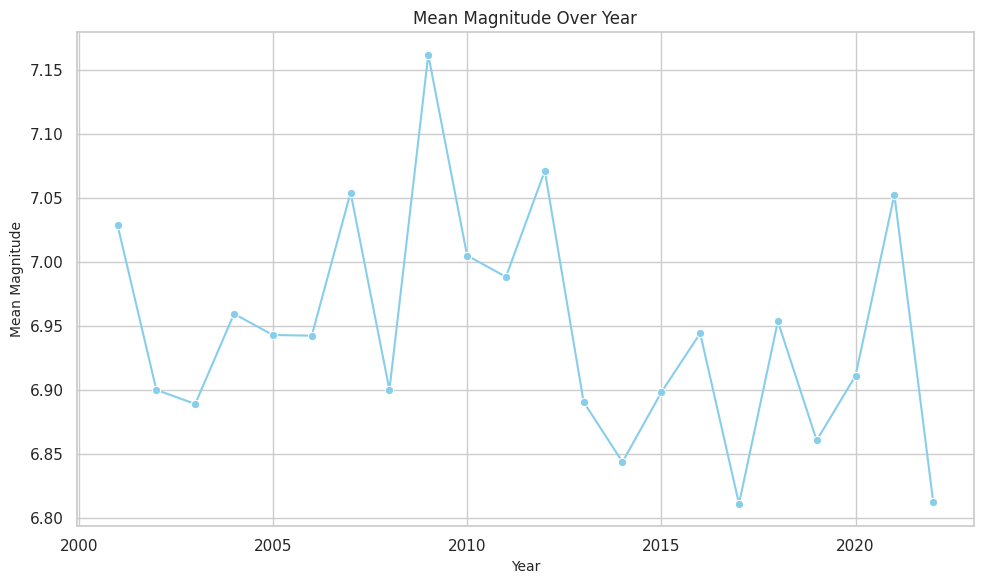

Line Plot of Mean Earthquake Depth Over Year:
This line plot displays the average earthquake depth (in kilometers) for each year. The x-axis represents the year, and the y-axis shows the mean depth. Trends (e.g., more shallow or deeper earthquakes over time) suggest features like depth bins or year-depth interactions. This plot helps identify temporal changes in earthquake characteristics for predictive modeling.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


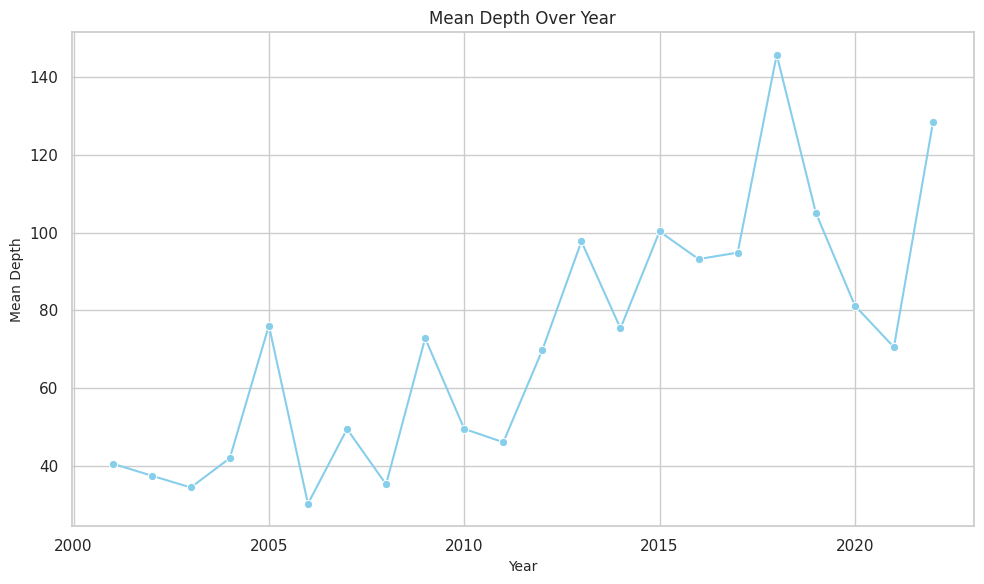

Line Plot of Mean CDI Over Year:
This line plot shows the average Community Internet Intensity (CDI, 0–9) for each year. The x-axis represents the year, and the y-axis shows the mean CDI. Trends in perceived shaking intensity over time can inform features like intensity thresholds or temporal indicators. Peaks may indicate years with stronger public-reported impacts, useful for tsunami prediction models.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


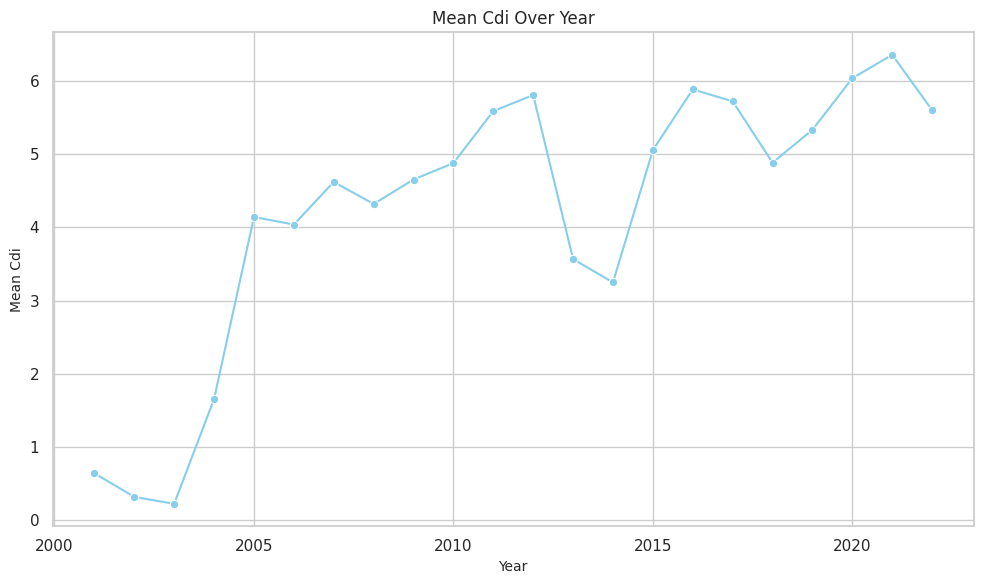

Line Plot of Mean MMI Over Year:
This line plot displays the average Modified Mercalli Intensity (MMI, 1–10) for each year. The x-axis represents the year, and the y-axis shows the mean MMI. Trends in shaking effects over time suggest features like MMI-based thresholds or temporal patterns. This plot helps identify years with more severe earthquake impacts for feature engineering.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


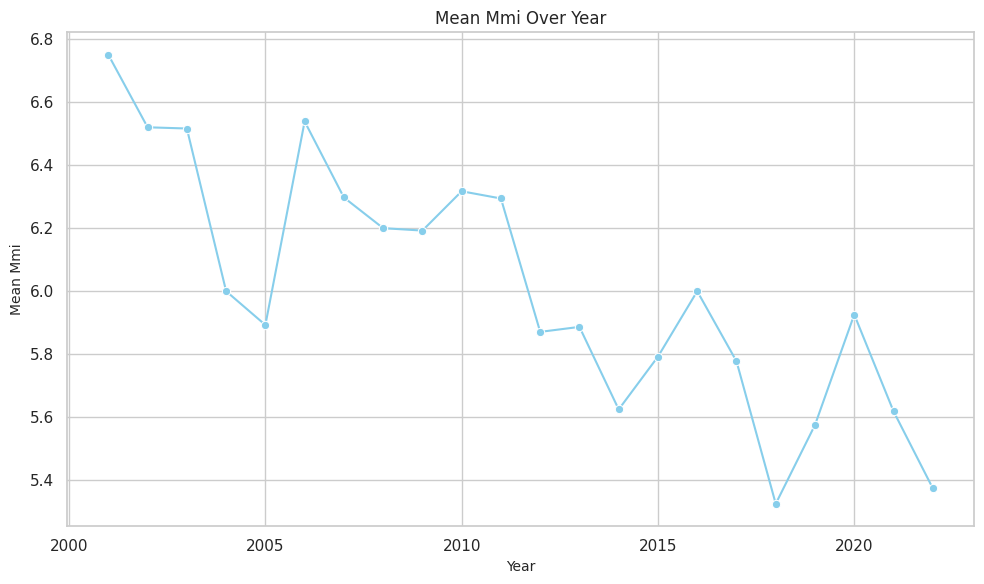

Line Plot of Mean SIG Over Year:
This line plot shows the average Significance (SIG) metric for each year, combining magnitude, intensity, and impact. The x-axis represents the year, and the y-axis shows the mean SIG. Trends or peaks suggest features like SIG thresholds or year-SIG interactions for modeling overall earthquake impact. This plot aids in understanding temporal changes in earthquake significance.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


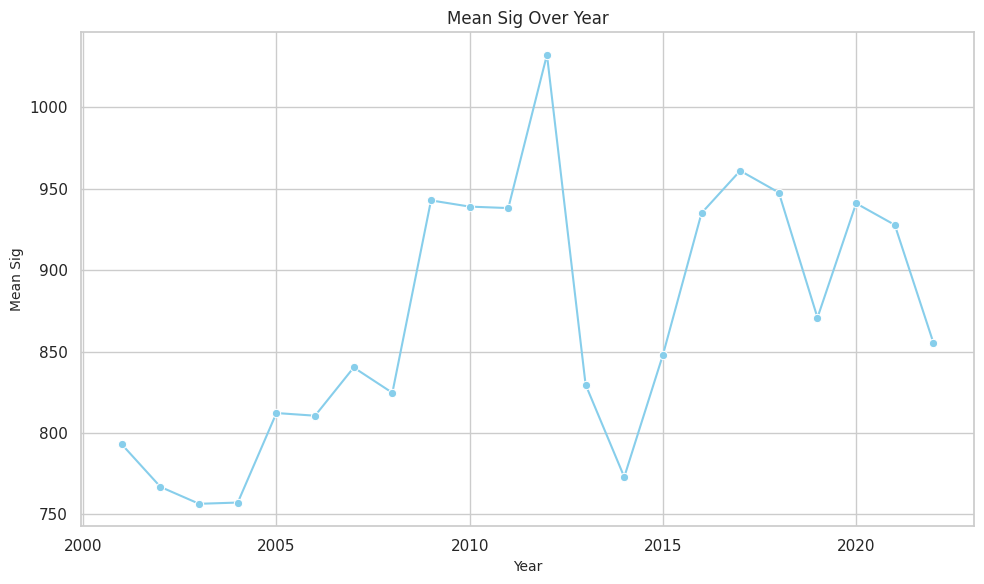

Line Plot of Tsunami Proportion Over Year:
This line plot shows the proportion of earthquakes that triggered a tsunami for each year. The x-axis represents the year, and the y-axis shows the mean of the tsunami column (proportion of 1s). Trends or spikes in tsunami occurrence suggest temporal features (e.g., year bins with high tsunami likelihood) for tsunami prediction. This plot is critical for identifying years with higher tsunami risk.



use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


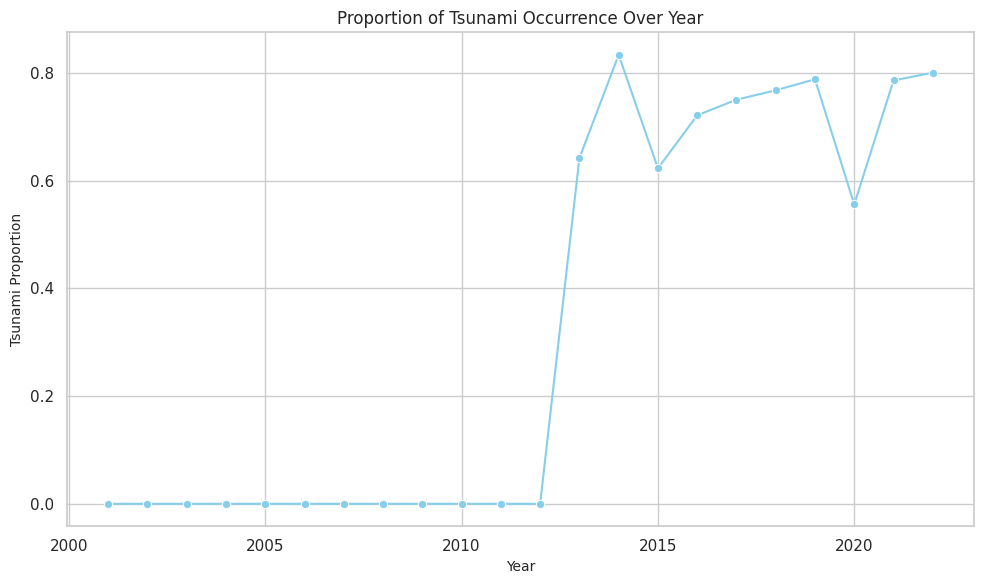

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Aggregate data by Year for numerical features and tsunami proportion
agg_data = data.groupby('Year').agg({
    'magnitude': 'mean',
    'depth': 'mean',
    'cdi': 'mean',
    'mmi': 'mean',
    'sig': 'mean',
    'tsunami': 'mean'  # Proportion of tsunami occurrences (0/1 binary, so mean = proportion)
}).reset_index()

# Descriptions for line plots
descriptions = {
    'magnitude_year': (
        'Line Plot of Mean Earthquake Magnitude Over Year:\n'
        'This line plot shows the average earthquake magnitude for each year in the dataset. '
        'The x-axis represents the year, and the y-axis shows the mean magnitude. '
        'Trends (e.g., increasing or decreasing magnitude) suggest temporal patterns that could be used for feature engineering, '
        'such as creating year bins (e.g., pre-2000 vs. post-2000) or a trend-based feature. '
        'Fluctuations or peaks may indicate significant seismic events, useful for modeling or analysis.'
    ),
    'depth_year': (
        'Line Plot of Mean Earthquake Depth Over Year:\n'
        'This line plot displays the average earthquake depth (in kilometers) for each year. '
        'The x-axis represents the year, and the y-axis shows the mean depth. '
        'Trends (e.g., more shallow or deeper earthquakes over time) suggest features like depth bins or year-depth interactions. '
        'This plot helps identify temporal changes in earthquake characteristics for predictive modeling.'
    ),
    'cdi_year': (
        'Line Plot of Mean CDI Over Year:\n'
        'This line plot shows the average Community Internet Intensity (CDI, 0–9) for each year. '
        'The x-axis represents the year, and the y-axis shows the mean CDI. '
        'Trends in perceived shaking intensity over time can inform features like intensity thresholds or temporal indicators. '
        'Peaks may indicate years with stronger public-reported impacts, useful for tsunami prediction models.'
    ),
    'mmi_year': (
        'Line Plot of Mean MMI Over Year:\n'
        'This line plot displays the average Modified Mercalli Intensity (MMI, 1–10) for each year. '
        'The x-axis represents the year, and the y-axis shows the mean MMI. '
        'Trends in shaking effects over time suggest features like MMI-based thresholds or temporal patterns. '
        'This plot helps identify years with more severe earthquake impacts for feature engineering.'
    ),
    'sig_year': (
        'Line Plot of Mean SIG Over Year:\n'
        'This line plot shows the average Significance (SIG) metric for each year, combining magnitude, intensity, and impact. '
        'The x-axis represents the year, and the y-axis shows the mean SIG. '
        'Trends or peaks suggest features like SIG thresholds or year-SIG interactions for modeling overall earthquake impact. '
        'This plot aids in understanding temporal changes in earthquake significance.'
    ),
    'tsunami_year': (
        'Line Plot of Tsunami Proportion Over Year:\n'
        'This line plot shows the proportion of earthquakes that triggered a tsunami for each year. '
        'The x-axis represents the year, and the y-axis shows the mean of the tsunami column (proportion of 1s). '
        'Trends or spikes in tsunami occurrence suggest temporal features (e.g., year bins with high tsunami likelihood) for tsunami prediction. '
        'This plot is critical for identifying years with higher tsunami risk.'
    )
}

# Create line plots
for col, desc in [
    ('magnitude', 'magnitude_year'),
    ('depth', 'depth_year'),
    ('cdi', 'cdi_year'),
    ('mmi', 'mmi_year'),
    ('sig', 'sig_year'),
    ('tsunami', 'tsunami_year')
]:
    print(descriptions[desc] + "\n")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=agg_data, x='Year', y=col, color='skyblue', marker='o')
    plt.title(f'Mean {col.capitalize()} Over Year' if col != 'tsunami' else 'Proportion of Tsunami Occurrence Over Year', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel(f'Mean {col.capitalize()}' if col != 'tsunami' else 'Tsunami Proportion', fontsize=10)
    plt.tight_layout()
    plt.show()

Count Plot Descriptions:

Count Plot of Earthquakes by Year:
This count plot shows the number of earthquakes recorded each year in the dataset. Each bar represents the frequency of earthquakes in a given year. This visualization helps identify trends in earthquake frequency over time, such as years with unusually high or low seismic activity.



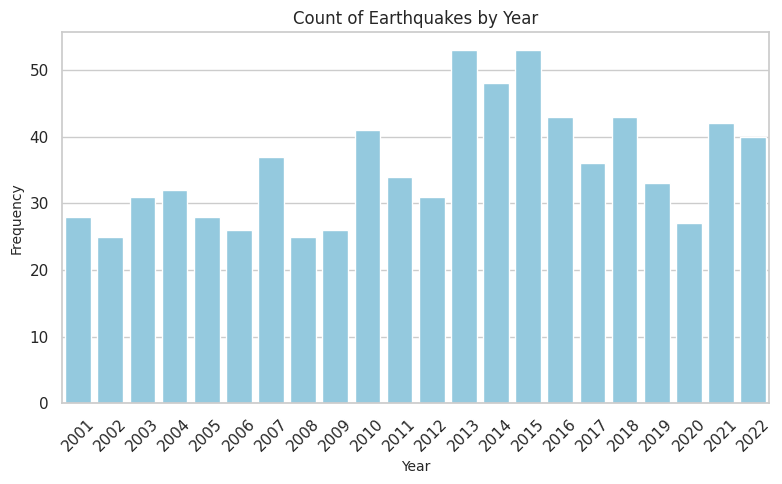

Count Plot of Earthquakes by Month:
This count plot displays the number of earthquakes recorded in each month (1–12). Each bar represents the frequency of earthquakes for a given month across all years. This plot can reveal seasonal patterns, if any, in earthquake occurrences.



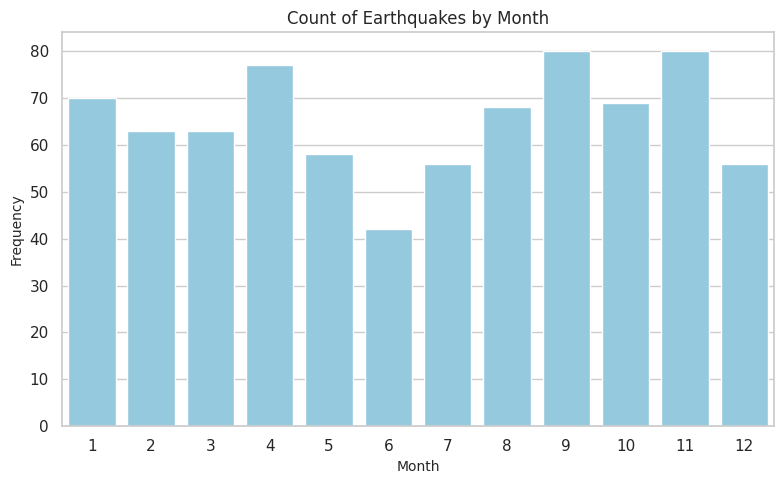

Count Plot of Tsunami Occurrence:
This count plot shows the frequency of earthquakes that triggered a tsunami (1) versus those that did not (0). The plot highlights the proportion of tsunami-generating earthquakes in the dataset, indicating how common tsunamis are associated with these seismic events.



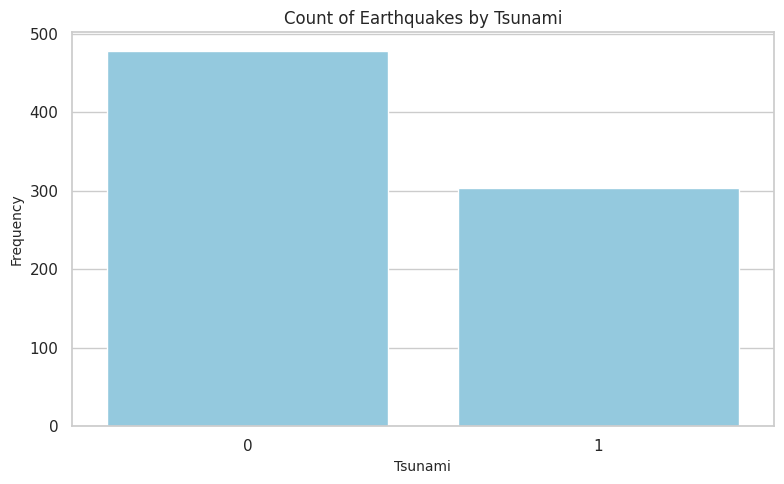


Bar Plot Descriptions:

Bar Plot of Mean Earthquake Magnitude by Year:
This bar plot shows the average earthquake magnitude for each year. Each bar represents the mean magnitude of earthquakes recorded in that year. This visualization helps identify whether certain years had more severe earthquakes on average.



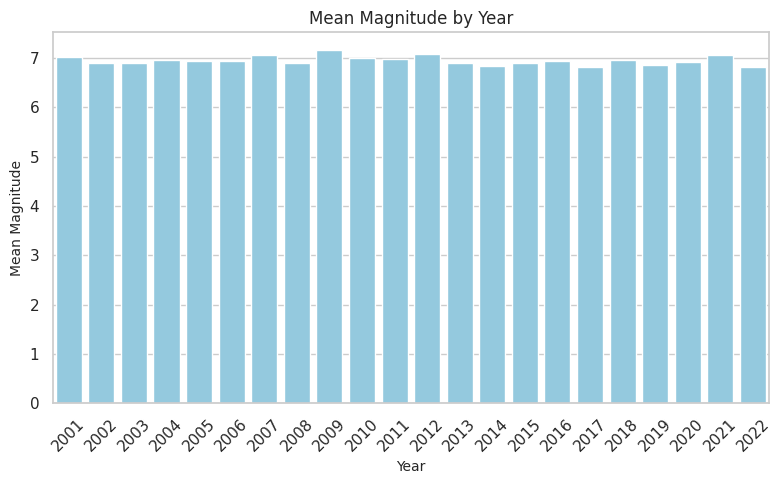

Bar Plot of Mean Earthquake Depth by Year:
This bar plot displays the average depth (in kilometers) of earthquakes for each year. Each bar represents the mean depth, indicating whether earthquakes in certain years were predominantly shallow, intermediate, or deep, which affects their surface impact.



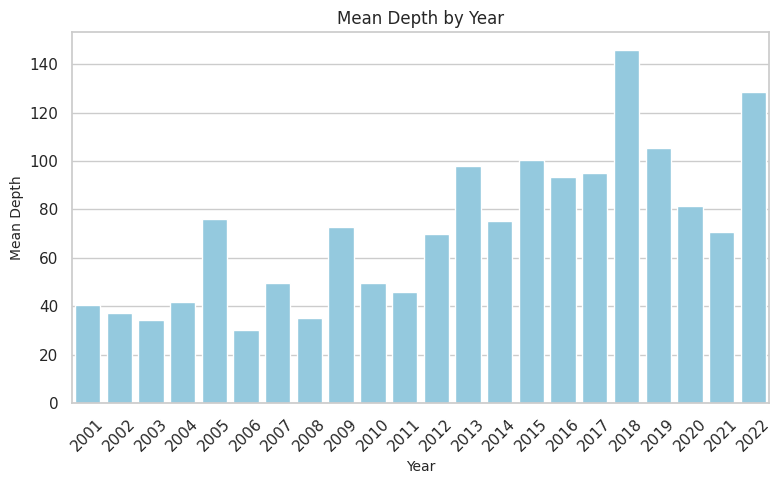

Bar Plot of Mean CDI by Year:
This bar plot shows the average Community Internet Intensity (CDI) for earthquakes each year. CDI measures perceived shaking intensity (0–9). Each bar represents the mean CDI, indicating the average perceived impact of earthquakes in each year.



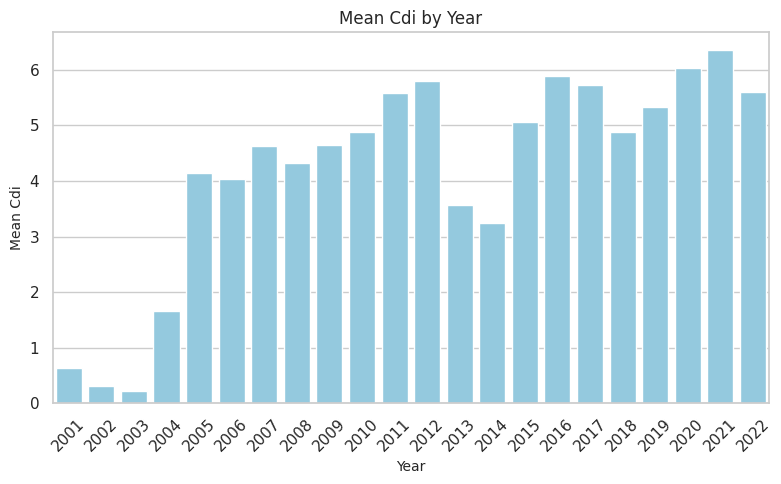

Bar Plot of Mean MMI by Year:
This bar plot displays the average Modified Mercalli Intensity (MMI) for earthquakes each year. MMI quantifies shaking effects (1–10). Each bar represents the mean MMI, showing the average intensity of earthquake effects across years.



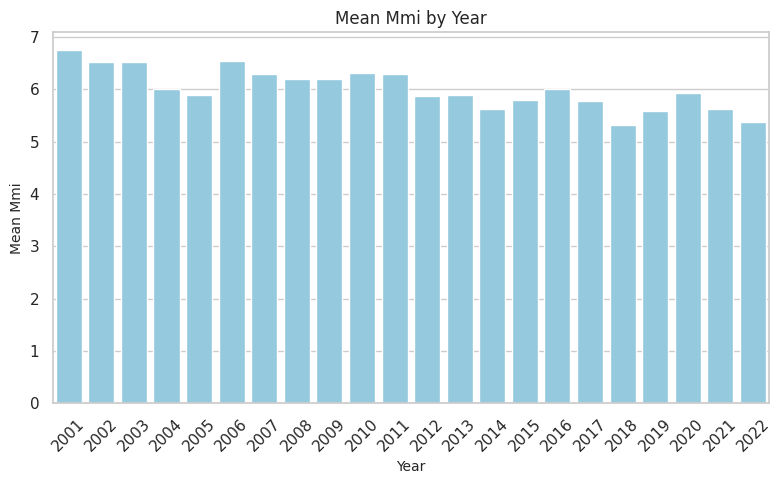

Bar Plot of Mean Significance (SIG) by Year:
This bar plot shows the average Significance (SIG) metric for earthquakes each year. SIG combines magnitude, intensity, and other factors to estimate impact. Each bar represents the mean SIG, indicating the average impact of earthquakes in each year.



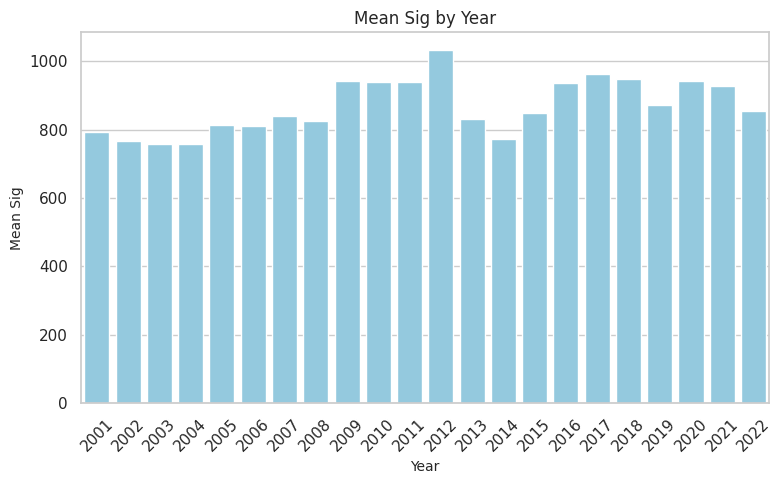

Bar Plot of Mean Earthquake Magnitude by Month:
This bar plot shows the average earthquake magnitude for each month (1–12). Each bar represents the mean magnitude of earthquakes in that month across all years. This plot helps identify any seasonal variations in earthquake severity.



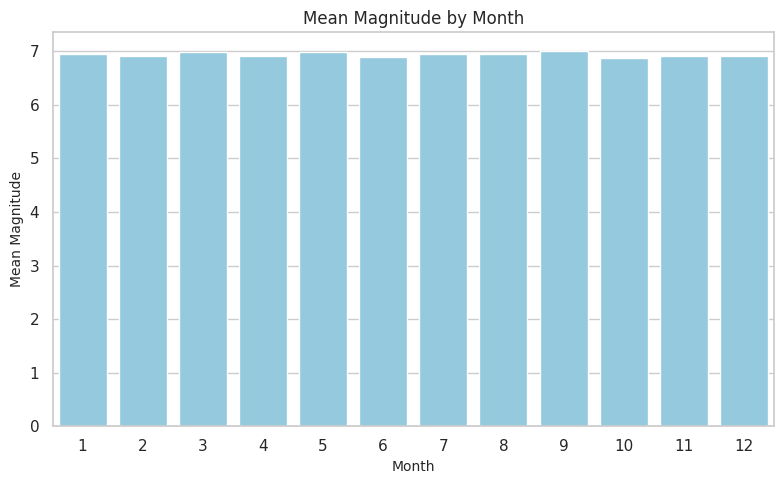

Bar Plot of Mean Earthquake Depth by Month:
This bar plot displays the average depth (in kilometers) of earthquakes for each month. Each bar represents the mean depth, revealing whether certain months have deeper or shallower earthquakes on average.



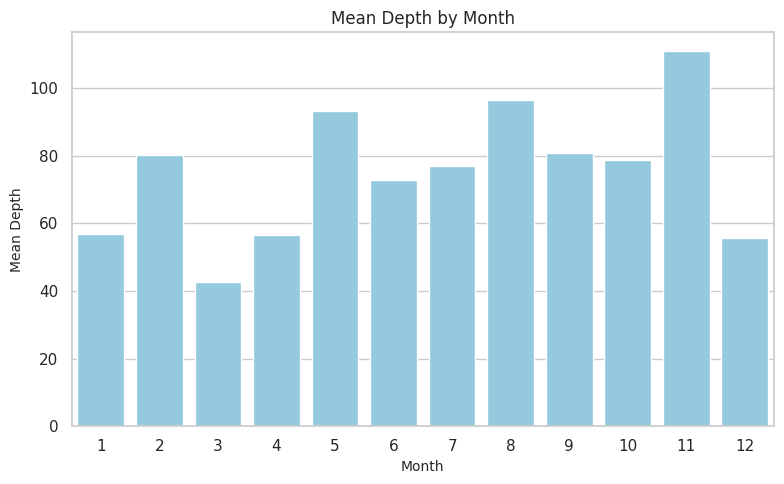

Bar Plot of Mean CDI by Month:
This bar plot shows the average Community Internet Intensity (CDI) for earthquakes in each month. Each bar represents the mean CDI, indicating whether certain months have higher perceived shaking intensity.



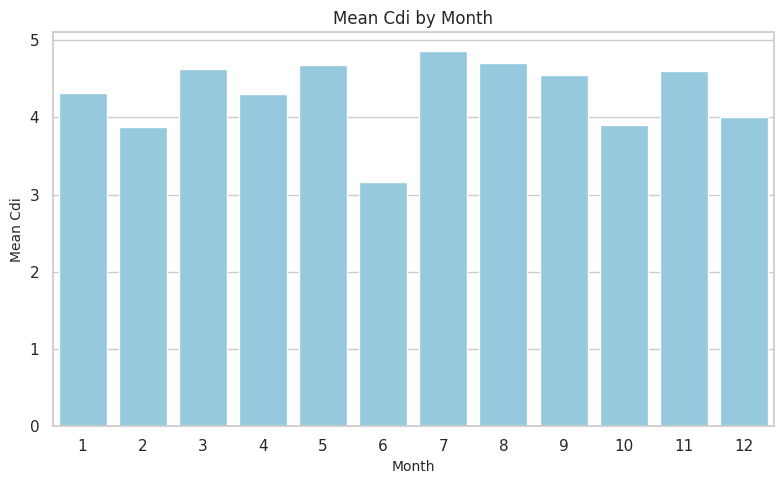

Bar Plot of Mean MMI by Month:
This bar plot displays the average Modified Mercalli Intensity (MMI) for earthquakes in each month. Each bar represents the mean MMI, showing whether certain months experience more intense earthquake effects.



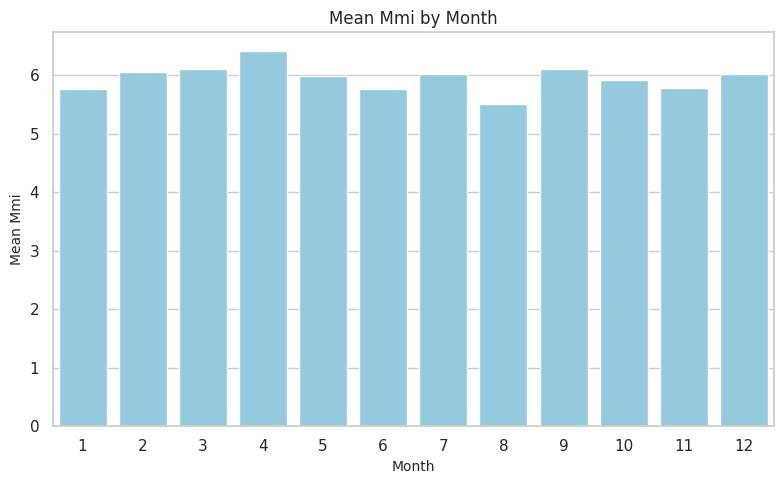

Bar Plot of Mean Significance (SIG) by Month:
This bar plot shows the average Significance (SIG) metric for earthquakes in each month. Each bar represents the mean SIG, indicating whether certain months have earthquakes with greater overall impact.



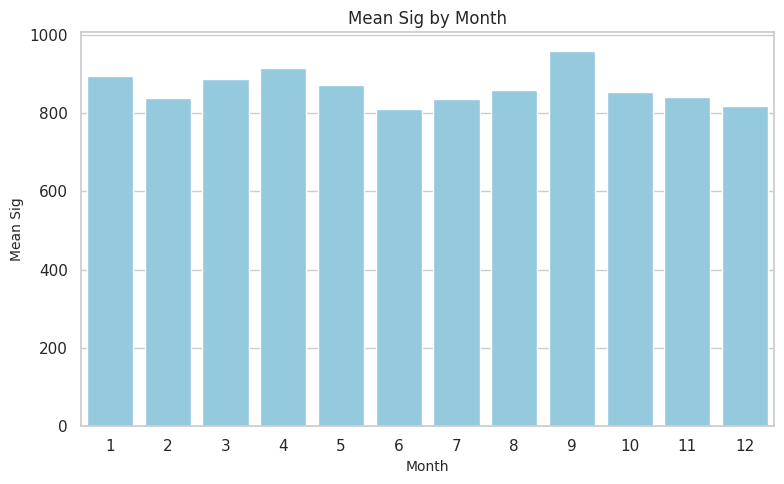

Bar Plot of Mean Earthquake Magnitude by Tsunami Occurrence:
This bar plot shows the average earthquake magnitude for earthquakes that triggered a tsunami (1) versus those that did not (0). Each bar represents the mean magnitude, indicating whether tsunami-generating earthquakes tend to have higher magnitudes.



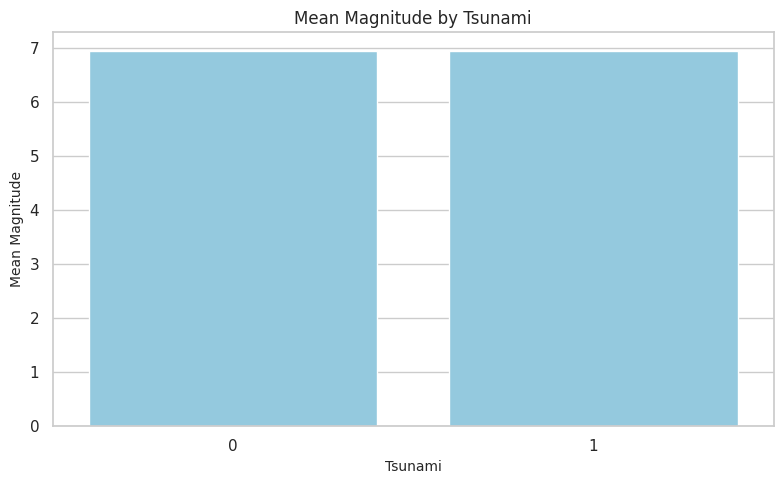

Bar Plot of Mean Earthquake Depth by Tsunami Occurrence:
This bar plot displays the average depth (in kilometers) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each bar represents the mean depth, showing whether tsunami-generating earthquakes are typically shallower or deeper.



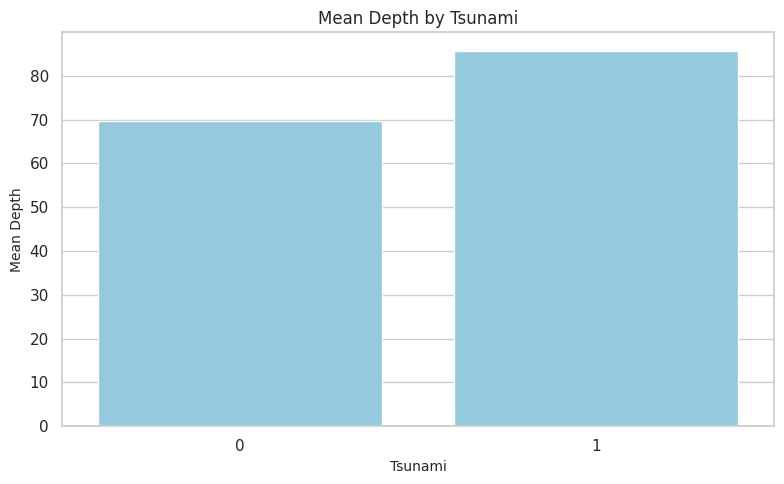

Bar Plot of Mean CDI by Tsunami Occurrence:
This bar plot shows the average Community Internet Intensity (CDI) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each bar represents the mean CDI, indicating whether tsunami-generating earthquakes have higher perceived shaking intensity.



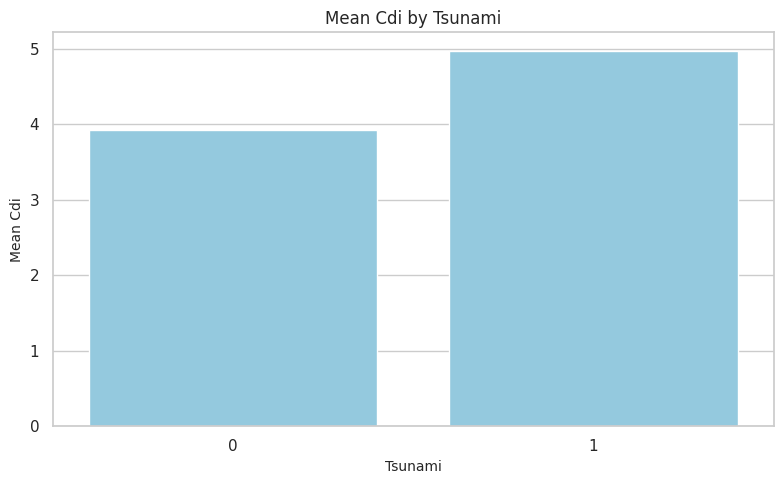

Bar Plot of Mean MMI by Tsunami Occurrence:
This bar plot displays the average Modified Mercalli Intensity (MMI) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each bar represents the mean MMI, showing whether tsunami-generating earthquakes have more intense effects.



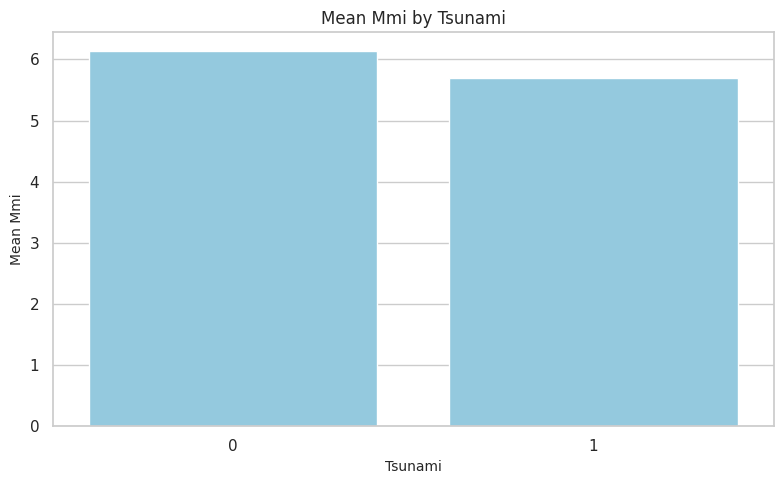

Bar Plot of Mean Significance (SIG) by Tsunami Occurrence:
This bar plot shows the average Significance (SIG) metric for earthquakes that triggered a tsunami (1) versus those that did not (0). Each bar represents the mean SIG, indicating whether tsunami-generating earthquakes have greater overall impact.



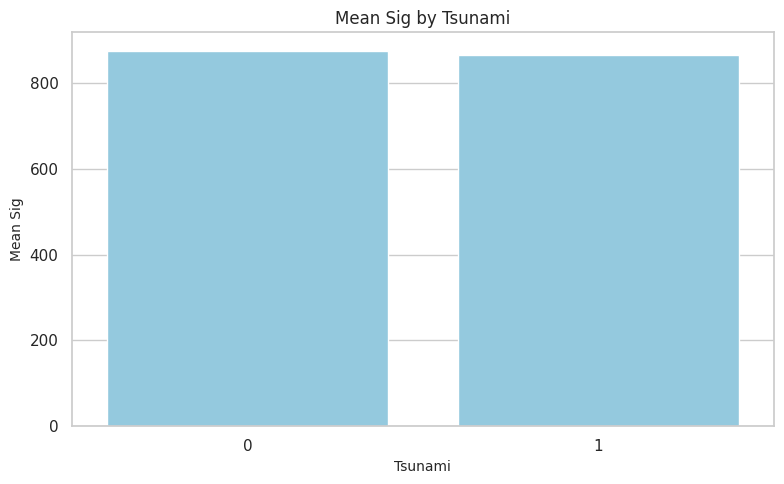

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Categorical and numerical columns
categorical_cols = ['Year', 'Month', 'tsunami']
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

# Descriptions for count plots
countplot_descriptions = {
    'Year': (
        'Count Plot of Earthquakes by Year:\n'
        'This count plot shows the number of earthquakes recorded each year in the dataset. '
        'Each bar represents the frequency of earthquakes in a given year. This visualization '
        'helps identify trends in earthquake frequency over time, such as years with unusually '
        'high or low seismic activity.'
    ),
    'Month': (
        'Count Plot of Earthquakes by Month:\n'
        'This count plot displays the number of earthquakes recorded in each month (1–12). '
        'Each bar represents the frequency of earthquakes for a given month across all years. '
        'This plot can reveal seasonal patterns, if any, in earthquake occurrences.'
    ),
    'tsunami': (
        'Count Plot of Tsunami Occurrence:\n'
        'This count plot shows the frequency of earthquakes that triggered a tsunami (1) versus '
        'those that did not (0). The plot highlights the proportion of tsunami-generating earthquakes '
        'in the dataset, indicating how common tsunamis are associated with these seismic events.'
    )
}

# Descriptions for bar plots
barplot_descriptions = {
    ('Year', 'magnitude'): (
        'Bar Plot of Mean Earthquake Magnitude by Year:\n'
        'This bar plot shows the average earthquake magnitude for each year. Each bar represents '
        'the mean magnitude of earthquakes recorded in that year. This visualization helps identify '
        'whether certain years had more severe earthquakes on average.'
    ),
    ('Year', 'depth'): (
        'Bar Plot of Mean Earthquake Depth by Year:\n'
        'This bar plot displays the average depth (in kilometers) of earthquakes for each year. '
        'Each bar represents the mean depth, indicating whether earthquakes in certain years were '
        'predominantly shallow, intermediate, or deep, which affects their surface impact.'
    ),
    ('Year', 'cdi'): (
        'Bar Plot of Mean CDI by Year:\n'
        'This bar plot shows the average Community Internet Intensity (CDI) for earthquakes each year. '
        'CDI measures perceived shaking intensity (0–9). Each bar represents the mean CDI, indicating '
        'the average perceived impact of earthquakes in each year.'
    ),
    ('Year', 'mmi'): (
        'Bar Plot of Mean MMI by Year:\n'
        'This bar plot displays the average Modified Mercalli Intensity (MMI) for earthquakes each year. '
        'MMI quantifies shaking effects (1–10). Each bar represents the mean MMI, showing the average '
        'intensity of earthquake effects across years.'
    ),
    ('Year', 'sig'): (
        'Bar Plot of Mean Significance (SIG) by Year:\n'
        'This bar plot shows the average Significance (SIG) metric for earthquakes each year. SIG combines '
        'magnitude, intensity, and other factors to estimate impact. Each bar represents the mean SIG, '
        'indicating the average impact of earthquakes in each year.'
    ),
    ('Month', 'magnitude'): (
        'Bar Plot of Mean Earthquake Magnitude by Month:\n'
        'This bar plot shows the average earthquake magnitude for each month (1–12). Each bar represents '
        'the mean magnitude of earthquakes in that month across all years. This plot helps identify any '
        'seasonal variations in earthquake severity.'
    ),
    ('Month', 'depth'): (
        'Bar Plot of Mean Earthquake Depth by Month:\n'
        'This bar plot displays the average depth (in kilometers) of earthquakes for each month. Each bar '
        'represents the mean depth, revealing whether certain months have deeper or shallower earthquakes on average.'
    ),
    ('Month', 'cdi'): (
        'Bar Plot of Mean CDI by Month:\n'
        'This bar plot shows the average Community Internet Intensity (CDI) for earthquakes in each month. '
        'Each bar represents the mean CDI, indicating whether certain months have higher perceived shaking intensity.'
    ),
    ('Month', 'mmi'): (
        'Bar Plot of Mean MMI by Month:\n'
        'This bar plot displays the average Modified Mercalli Intensity (MMI) for earthquakes in each month. '
        'Each bar represents the mean MMI, showing whether certain months experience more intense earthquake effects.'
    ),
    ('Month', 'sig'): (
        'Bar Plot of Mean Significance (SIG) by Month:\n'
        'This bar plot shows the average Significance (SIG) metric for earthquakes in each month. Each bar '
        'represents the mean SIG, indicating whether certain months have earthquakes with greater overall impact.'
    ),
    ('tsunami', 'magnitude'): (
        'Bar Plot of Mean Earthquake Magnitude by Tsunami Occurrence:\n'
        'This bar plot shows the average earthquake magnitude for earthquakes that triggered a tsunami (1) versus '
        'those that did not (0). Each bar represents the mean magnitude, indicating whether tsunami-generating earthquakes '
        'tend to have higher magnitudes.'
    ),
    ('tsunami', 'depth'): (
        'Bar Plot of Mean Earthquake Depth by Tsunami Occurrence:\n'
        'This bar plot displays the average depth (in kilometers) for earthquakes that triggered a tsunami (1) versus '
        'those that did not (0). Each bar represents the mean depth, showing whether tsunami-generating earthquakes are '
        'typically shallower or deeper.'
    ),
    ('tsunami', 'cdi'): (
        'Bar Plot of Mean CDI by Tsunami Occurrence:\n'
        'This bar plot shows the average Community Internet Intensity (CDI) for earthquakes that triggered a tsunami (1) '
        'versus those that did not (0). Each bar represents the mean CDI, indicating whether tsunami-generating earthquakes '
        'have higher perceived shaking intensity.'
    ),
    ('tsunami', 'mmi'): (
        'Bar Plot of Mean MMI by Tsunami Occurrence:\n'
        'This bar plot displays the average Modified Mercalli Intensity (MMI) for earthquakes that triggered a tsunami (1) '
        'versus those that did not (0). Each bar represents the mean MMI, showing whether tsunami-generating earthquakes have '
        'more intense effects.'
    ),
    ('tsunami', 'sig'): (
        'Bar Plot of Mean Significance (SIG) by Tsunami Occurrence:\n'
        'This bar plot shows the average Significance (SIG) metric for earthquakes that triggered a tsunami (1) versus those '
        'that did not (0). Each bar represents the mean SIG, indicating whether tsunami-generating earthquakes have greater overall impact.'
    )
}

# Print count plot descriptions and create count plots
print("Count Plot Descriptions:\n")
for col in categorical_cols:
    print(countplot_descriptions[col] + "\n")
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, color='skyblue')
    plt.title(f'Count of Earthquakes by {col.capitalize()}', fontsize=12)
    plt.xlabel(col.capitalize(), fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(rotation=45 if col == 'Year' else 0)  # Rotate x-axis labels for Year
    plt.tight_layout()
    plt.show()

# Create bar plots for each categorical-numerical pair
print("\nBar Plot Descriptions:\n")
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        print(barplot_descriptions[(cat_col, num_col)] + "\n")
        plt.figure(figsize=(8, 5))
        sns.barplot(data=data, x=cat_col, y=num_col, color='skyblue', errorbar=None)
        plt.title(f'Mean {num_col.capitalize()} by {cat_col.capitalize()}', fontsize=12)
        plt.xlabel(cat_col.capitalize(), fontsize=10)
        plt.ylabel(f'Mean {num_col.capitalize()}', fontsize=10)
        plt.xticks(rotation=45 if cat_col == 'Year' else 0)  # Rotate x-axis labels for Year
        plt.tight_layout()
        plt.show()

Box Plot Descriptions:

Box Plot of Earthquake Magnitude by Year:
This box plot shows the distribution of earthquake magnitudes for each year in the dataset. Each box represents the interquartile range (IQR) of magnitudes, with the median line inside, whiskers extending to the minimum and maximum values (within 1.5*IQR), and points indicating outliers. This plot helps identify years with consistently high or low magnitudes and highlights variability or extreme events.



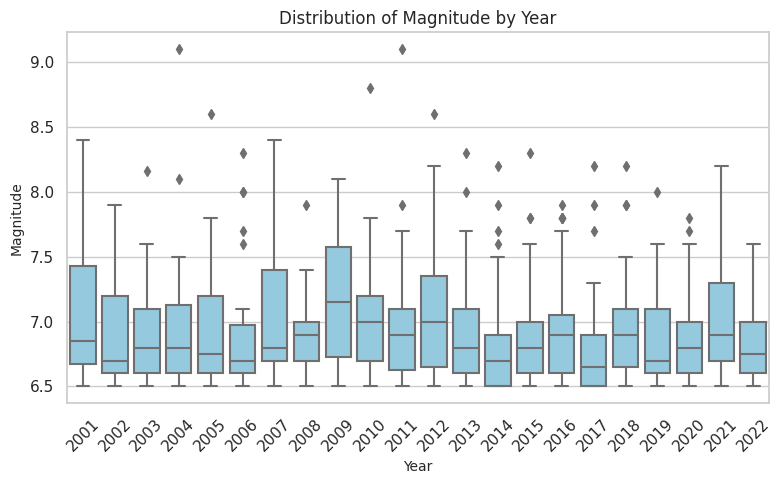

Box Plot of Earthquake Depth by Year:
This box plot displays the distribution of earthquake depths (in kilometers) for each year. Each box shows the IQR of depths, with the median, whiskers, and outliers. It reveals whether certain years had predominantly shallow (0–70 km), intermediate (70–300 km), or deep (>300 km) earthquakes, and identifies variability or extreme depths.



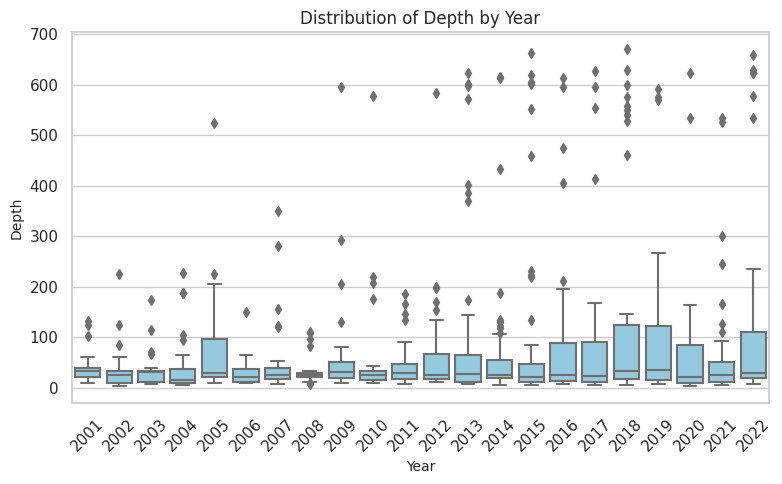

Box Plot of Community Internet Intensity (CDI) by Year:
This box plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each year. Each box represents the IQR, with the median, whiskers, and outliers. It indicates how perceived shaking intensity varied across years, highlighting years with stronger or weaker reported impacts.



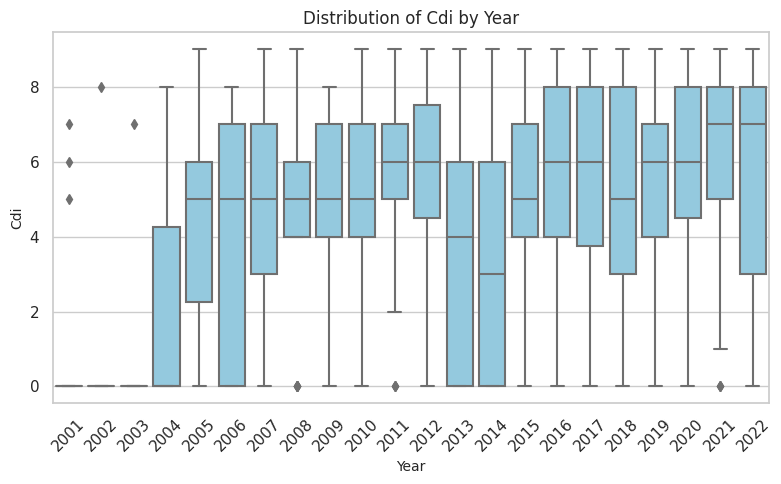

Box Plot of Modified Mercalli Intensity (MMI) by Year:
This box plot displays the distribution of MMI values (shaking effects, 1–10) for each year. Each box shows the IQR, median, whiskers, and outliers. It reveals variations in earthquake intensity across years, identifying years with more severe shaking effects.



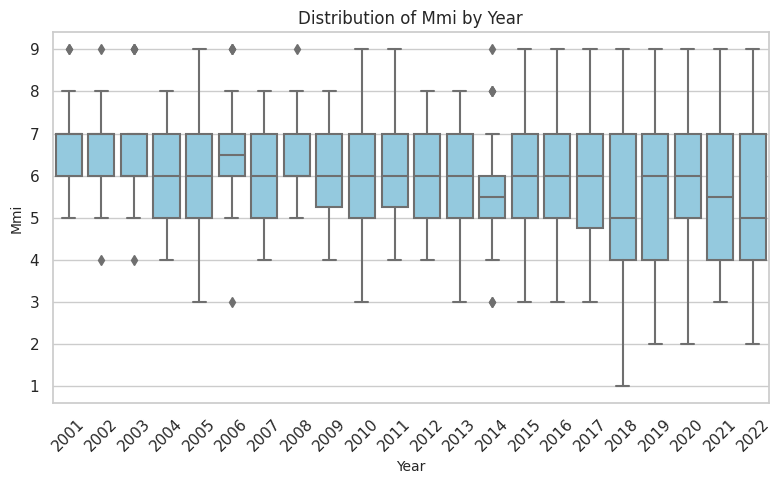

Box Plot of Earthquake Significance (SIG) by Year:
This box plot shows the distribution of SIG values (combining magnitude, intensity, and impact) for each year. Each box represents the IQR, with the median, whiskers, and outliers. It highlights years with higher or lower overall earthquake impact and identifies extreme events.



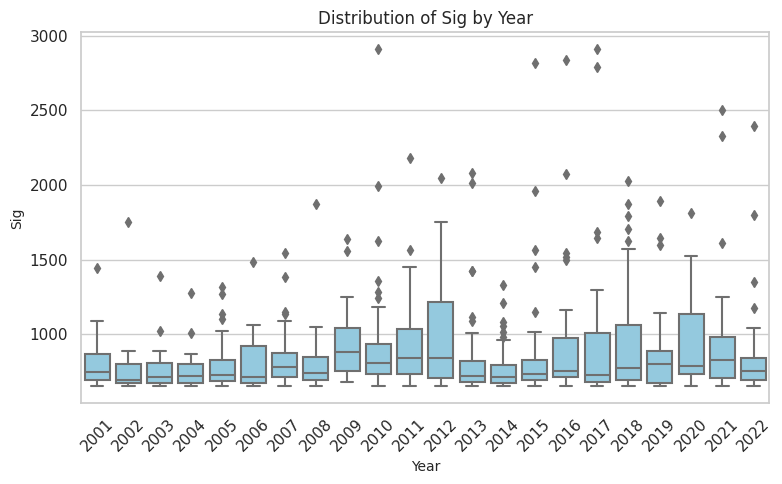

Box Plot of Earthquake Magnitude by Month:
This box plot shows the distribution of earthquake magnitudes for each month (1–12). Each box represents the IQR, with the median, whiskers, and outliers. It helps identify any seasonal patterns in earthquake magnitude, such as months with consistently higher or lower magnitudes.



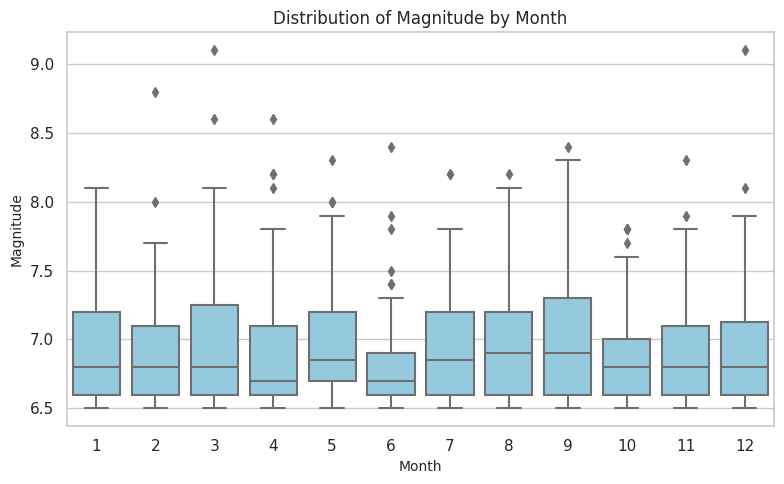

Box Plot of Earthquake Depth by Month:
This box plot displays the distribution of earthquake depths (in kilometers) for each month. Each box shows the IQR, median, whiskers, and outliers. It reveals whether certain months have deeper or shallower earthquakes, indicating potential seasonal variations.



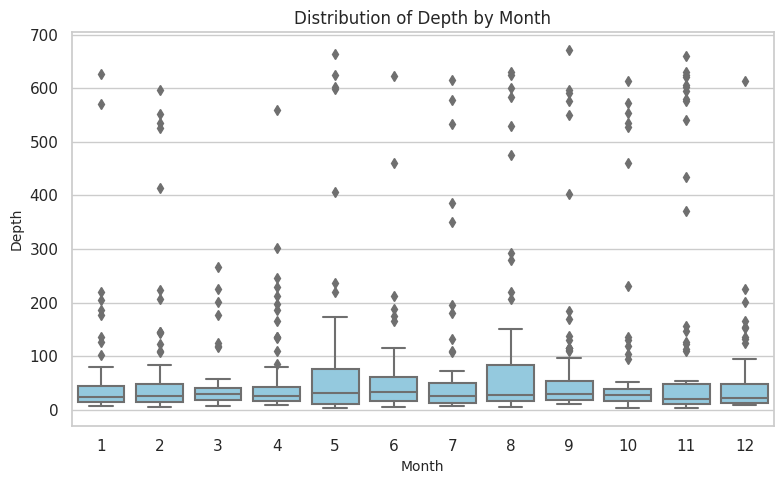

Box Plot of Community Internet Intensity (CDI) by Month:
This box plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each month. Each box represents the IQR, with the median, whiskers, and outliers. It indicates whether certain months have higher perceived shaking intensity, suggesting seasonal patterns.



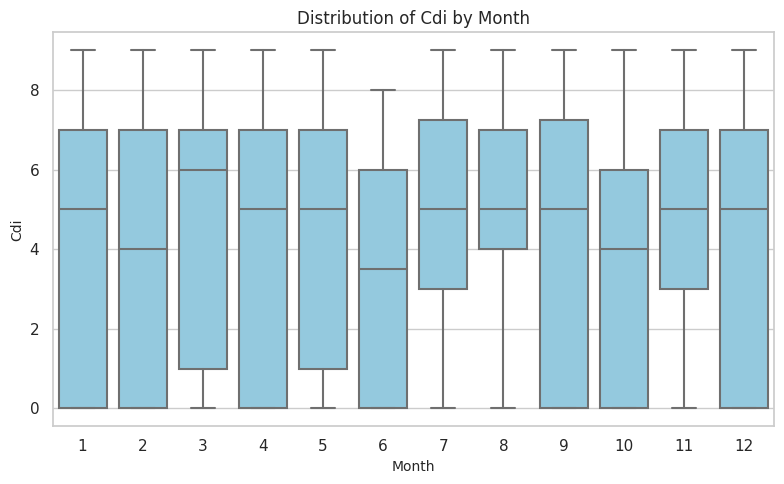

Box Plot of Modified Mercalli Intensity (MMI) by Month:
This box plot displays the distribution of MMI values (shaking effects, 1–10) for each month. Each box shows the IQR, median, whiskers, and outliers. It highlights months with more intense earthquake effects, revealing potential seasonal trends.



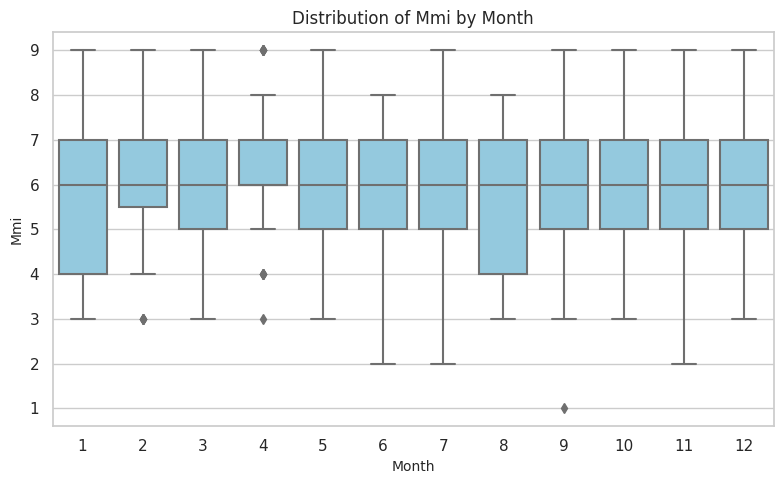

Box Plot of Earthquake Significance (SIG) by Month:
This box plot shows the distribution of SIG values (overall impact) for each month. Each box represents the IQR, with the median, whiskers, and outliers. It indicates whether certain months have earthquakes with greater overall impact, suggesting seasonal variations.



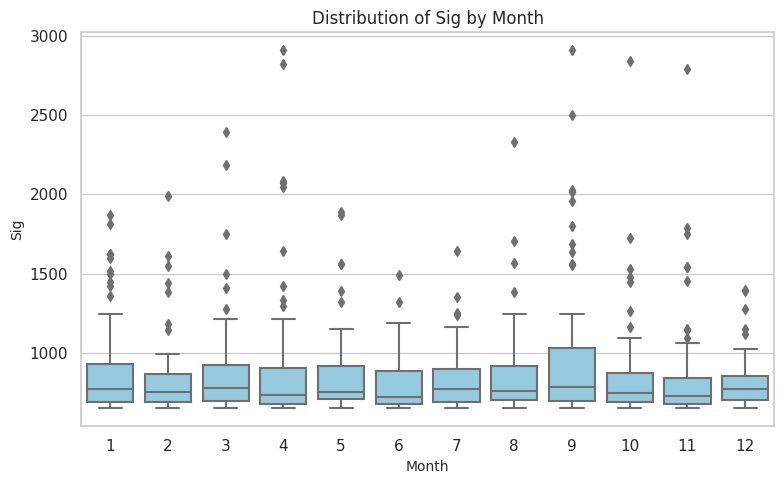

Box Plot of Earthquake Magnitude by Tsunami Occurrence:
This box plot shows the distribution of earthquake magnitudes for earthquakes that triggered a tsunami (1) versus those that did not (0). Each box represents the IQR, with the median, whiskers, and outliers. It reveals whether tsunami-generating earthquakes tend to have higher or more variable magnitudes.



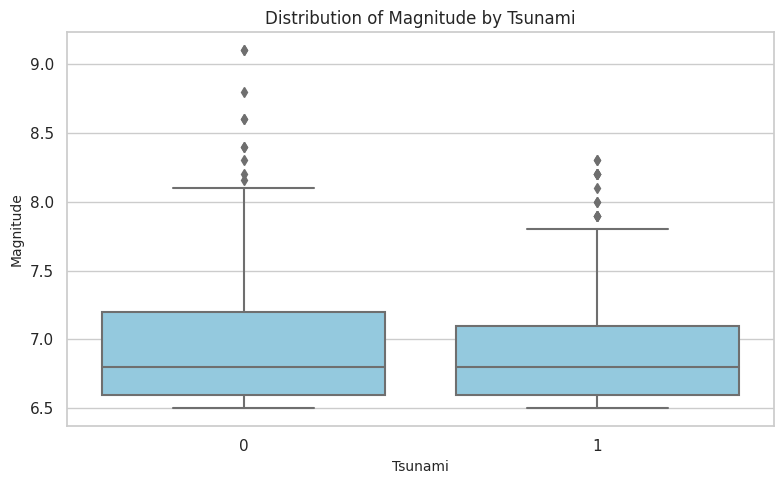

Box Plot of Earthquake Depth by Tsunami Occurrence:
This box plot displays the distribution of earthquake depths (in kilometers) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each box shows the IQR, median, whiskers, and outliers. It indicates whether tsunami-generating earthquakes are typically shallower or deeper, which is critical for tsunami risk.



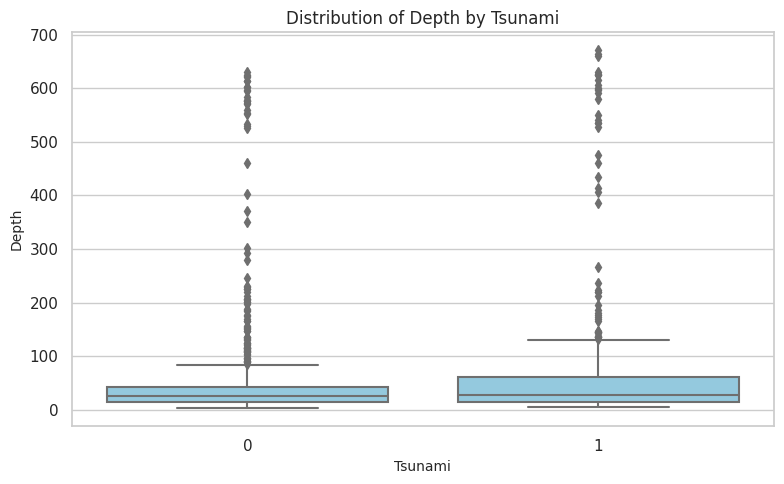

Box Plot of Community Internet Intensity (CDI) by Tsunami Occurrence:
This box plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each box represents the IQR, with the median, whiskers, and outliers. It highlights whether tsunami-generating earthquakes have higher perceived shaking intensity.



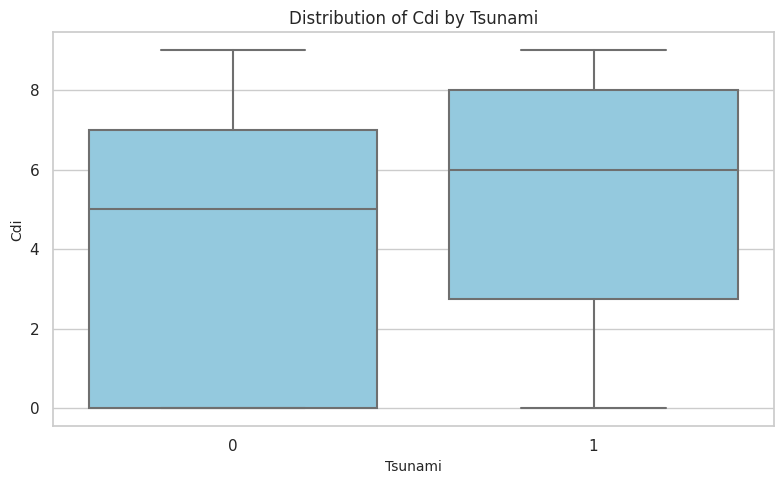

Box Plot of Modified Mercalli Intensity (MMI) by Tsunami Occurrence:
This box plot displays the distribution of MMI values (shaking effects, 1–10) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each box shows the IQR, median, whiskers, and outliers. It shows whether tsunami-generating earthquakes have more intense effects.



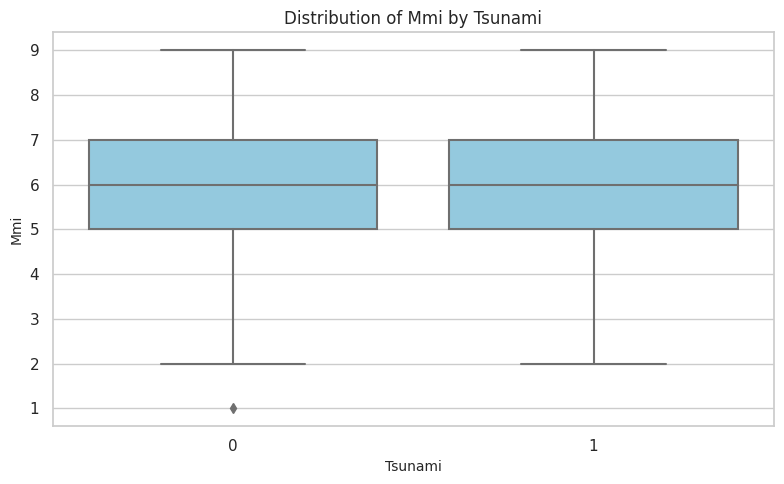

Box Plot of Earthquake Significance (SIG) by Tsunami Occurrence:
This box plot shows the distribution of SIG values (overall impact) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each box represents the IQR, with the median, whiskers, and outliers. It indicates whether tsunami-generating earthquakes have greater overall impact.



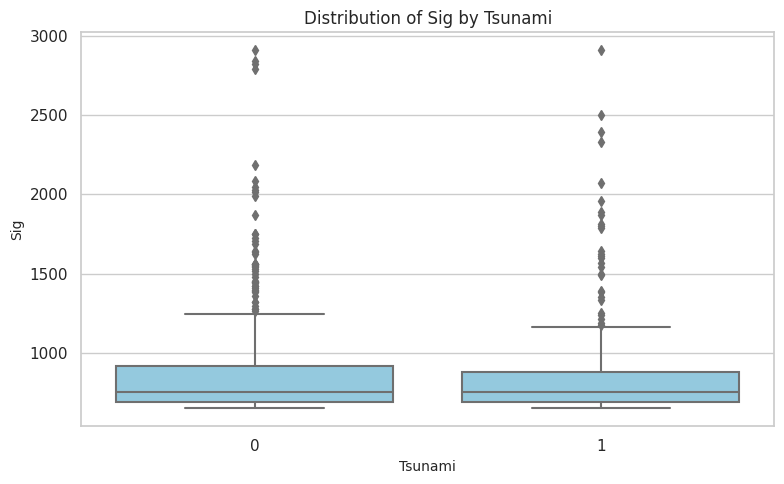

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Categorical and numerical columns
categorical_cols = ['Year', 'Month', 'tsunami']
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

# Descriptions for box plots
boxplot_descriptions = {
    ('Year', 'magnitude'): (
        'Box Plot of Earthquake Magnitude by Year:\n'
        'This box plot shows the distribution of earthquake magnitudes for each year in the dataset. '
        'Each box represents the interquartile range (IQR) of magnitudes, with the median line inside, '
        'whiskers extending to the minimum and maximum values (within 1.5*IQR), and points indicating outliers. '
        'This plot helps identify years with consistently high or low magnitudes and highlights variability or extreme events.'
    ),
    ('Year', 'depth'): (
        'Box Plot of Earthquake Depth by Year:\n'
        'This box plot displays the distribution of earthquake depths (in kilometers) for each year. '
        'Each box shows the IQR of depths, with the median, whiskers, and outliers. It reveals whether certain years '
        'had predominantly shallow (0–70 km), intermediate (70–300 km), or deep (>300 km) earthquakes, and identifies variability or extreme depths.'
    ),
    ('Year', 'cdi'): (
        'Box Plot of Community Internet Intensity (CDI) by Year:\n'
        'This box plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each year. '
        'Each box represents the IQR, with the median, whiskers, and outliers. It indicates how perceived shaking intensity '
        'varied across years, highlighting years with stronger or weaker reported impacts.'
    ),
    ('Year', 'mmi'): (
        'Box Plot of Modified Mercalli Intensity (MMI) by Year:\n'
        'This box plot displays the distribution of MMI values (shaking effects, 1–10) for each year. '
        'Each box shows the IQR, median, whiskers, and outliers. It reveals variations in earthquake intensity across years, '
        'identifying years with more severe shaking effects.'
    ),
    ('Year', 'sig'): (
        'Box Plot of Earthquake Significance (SIG) by Year:\n'
        'This box plot shows the distribution of SIG values (combining magnitude, intensity, and impact) for each year. '
        'Each box represents the IQR, with the median, whiskers, and outliers. It highlights years with higher or lower overall '
        'earthquake impact and identifies extreme events.'
    ),
    ('Month', 'magnitude'): (
        'Box Plot of Earthquake Magnitude by Month:\n'
        'This box plot shows the distribution of earthquake magnitudes for each month (1–12). Each box represents the IQR, '
        'with the median, whiskers, and outliers. It helps identify any seasonal patterns in earthquake magnitude, such as months '
        'with consistently higher or lower magnitudes.'
    ),
    ('Month', 'depth'): (
        'Box Plot of Earthquake Depth by Month:\n'
        'This box plot displays the distribution of earthquake depths (in kilometers) for each month. Each box shows the IQR, '
        'median, whiskers, and outliers. It reveals whether certain months have deeper or shallower earthquakes, indicating potential seasonal variations.'
    ),
    ('Month', 'cdi'): (
        'Box Plot of Community Internet Intensity (CDI) by Month:\n'
        'This box plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each month. Each box represents '
        'the IQR, with the median, whiskers, and outliers. It indicates whether certain months have higher perceived shaking intensity, suggesting seasonal patterns.'
    ),
    ('Month', 'mmi'): (
        'Box Plot of Modified Mercalli Intensity (MMI) by Month:\n'
        'This box plot displays the distribution of MMI values (shaking effects, 1–10) for each month. Each box shows the IQR, '
        'median, whiskers, and outliers. It highlights months with more intense earthquake effects, revealing potential seasonal trends.'
    ),
    ('Month', 'sig'): (
        'Box Plot of Earthquake Significance (SIG) by Month:\n'
        'This box plot shows the distribution of SIG values (overall impact) for each month. Each box represents the IQR, with the '
        'median, whiskers, and outliers. It indicates whether certain months have earthquakes with greater overall impact, suggesting seasonal variations.'
    ),
    ('tsunami', 'magnitude'): (
        'Box Plot of Earthquake Magnitude by Tsunami Occurrence:\n'
        'This box plot shows the distribution of earthquake magnitudes for earthquakes that triggered a tsunami (1) versus those that '
        'did not (0). Each box represents the IQR, with the median, whiskers, and outliers. It reveals whether tsunami-generating earthquakes '
        'tend to have higher or more variable magnitudes.'
    ),
    ('tsunami', 'depth'): (
        'Box Plot of Earthquake Depth by Tsunami Occurrence:\n'
        'This box plot displays the distribution of earthquake depths (in kilometers) for earthquakes that triggered a tsunami (1) versus '
        'those that did not (0). Each box shows the IQR, median, whiskers, and outliers. It indicates whether tsunami-generating earthquakes '
        'are typically shallower or deeper, which is critical for tsunami risk.'
    ),
    ('tsunami', 'cdi'): (
        'Box Plot of Community Internet Intensity (CDI) by Tsunami Occurrence:\n'
        'This box plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for earthquakes that triggered a tsunami (1) '
        'versus those that did not (0). Each box represents the IQR, with the median, whiskers, and outliers. It highlights whether tsunami-generating '
        'earthquakes have higher perceived shaking intensity.'
    ),
    ('tsunami', 'mmi'): (
        'Box Plot of Modified Mercalli Intensity (MMI) by Tsunami Occurrence:\n'
        'This box plot displays the distribution of MMI values (shaking effects, 1–10) for earthquakes that triggered a tsunami (1) versus '
        'those that did not (0). Each box shows the IQR, median, whiskers, and outliers. It shows whether tsunami-generating earthquakes have more intense effects.'
    ),
    ('tsunami', 'sig'): (
        'Box Plot of Earthquake Significance (SIG) by Tsunami Occurrence:\n'
        'This box plot shows the distribution of SIG values (overall impact) for earthquakes that triggered a tsunami (1) versus those that '
        'did not (0). Each box represents the IQR, with the median, whiskers, and outliers. It indicates whether tsunami-generating earthquakes have greater overall impact.'
    )
}

# Print box plot descriptions and create box plots
print("Box Plot Descriptions:\n")
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        print(boxplot_descriptions[(cat_col, num_col)] + "\n")
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x=cat_col, y=num_col, color='skyblue')
        plt.title(f'Distribution of {num_col.capitalize()} by {cat_col.capitalize()}', fontsize=12)
        plt.xlabel(cat_col.capitalize(), fontsize=10)
        plt.ylabel(num_col.capitalize(), fontsize=10)
        plt.xticks(rotation=45 if cat_col == 'Year' else 0)  # Rotate x-axis labels for Year
        plt.tight_layout()
        plt.show()

Violin Plot Descriptions:

Violin Plot of Earthquake Magnitude by Year:
This violin plot shows the distribution of earthquake magnitudes for each year in the dataset. Each violin represents the kernel density estimation (KDE) of magnitudes, with wider sections indicating higher density and the inner box plot showing the median and interquartile range (IQR). This plot reveals the shape of magnitude distributions, highlighting years with high variability, multimodal patterns, or extreme values.



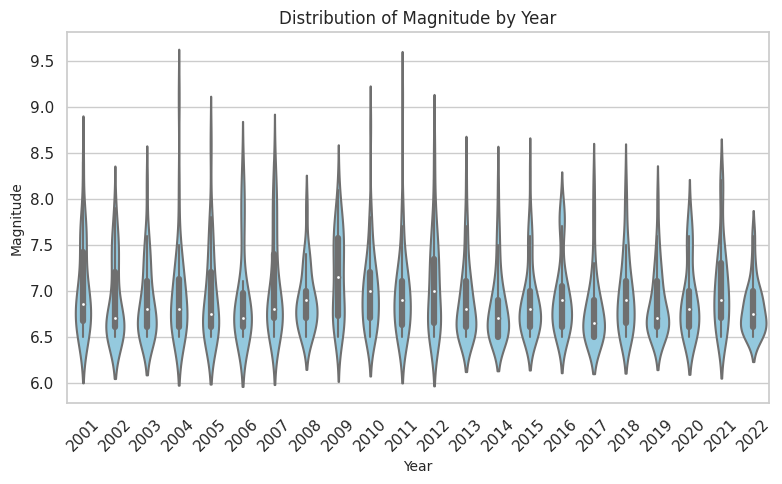

Violin Plot of Earthquake Depth by Year:
This violin plot displays the distribution of earthquake depths (in kilometers) for each year. Each violin shows the KDE of depths, with the inner box plot indicating the median and IQR. It reveals whether certain years had predominantly shallow (0–70 km), intermediate (70–300 km), or deep (>300 km) earthquakes, and identifies variability or unusual distributions.



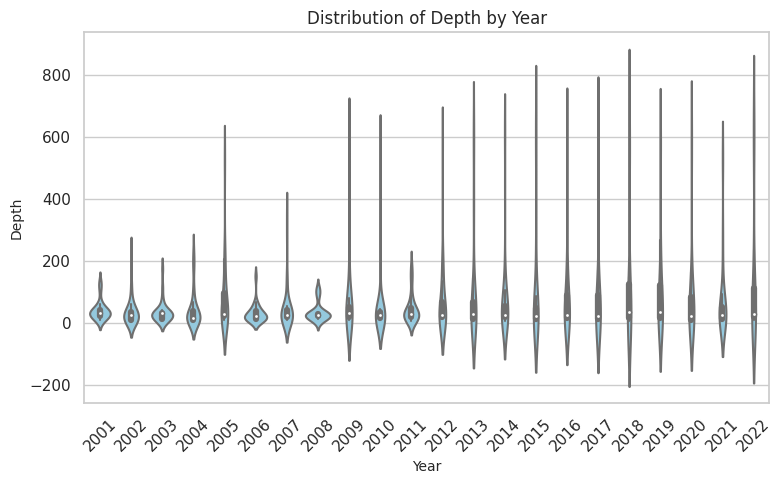

Violin Plot of Community Internet Intensity (CDI) by Year:
This violin plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each year. Each violin represents the KDE, with the inner box plot showing the median and IQR. It highlights how perceived shaking intensity varied across years, revealing years with concentrated or diverse intensity distributions.



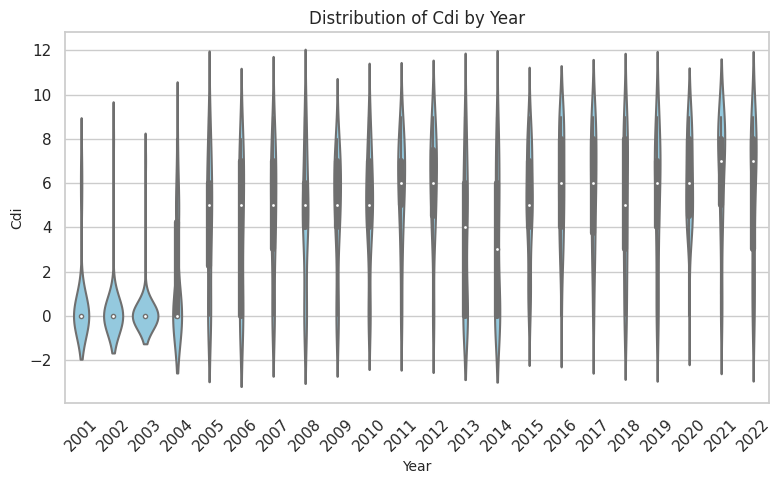

Violin Plot of Modified Mercalli Intensity (MMI) by Year:
This violin plot displays the distribution of MMI values (shaking effects, 1–10) for each year. Each violin shows the KDE, with the inner box plot indicating the median and IQR. It reveals variations in earthquake intensity across years, highlighting years with more severe shaking effects or multimodal distributions.



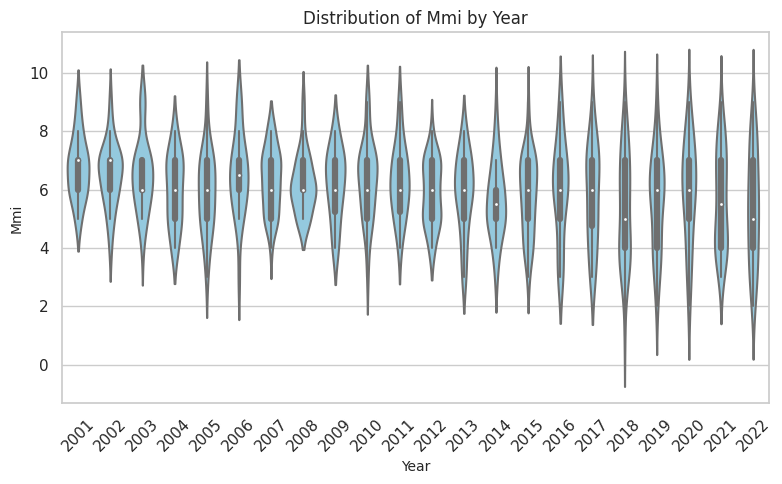

Violin Plot of Earthquake Significance (SIG) by Year:
This violin plot shows the distribution of SIG values (combining magnitude, intensity, and impact) for each year. Each violin represents the KDE, with the inner box plot showing the median and IQR. It highlights years with higher or lower overall earthquake impact and identifies unusual distribution shapes or extreme events.



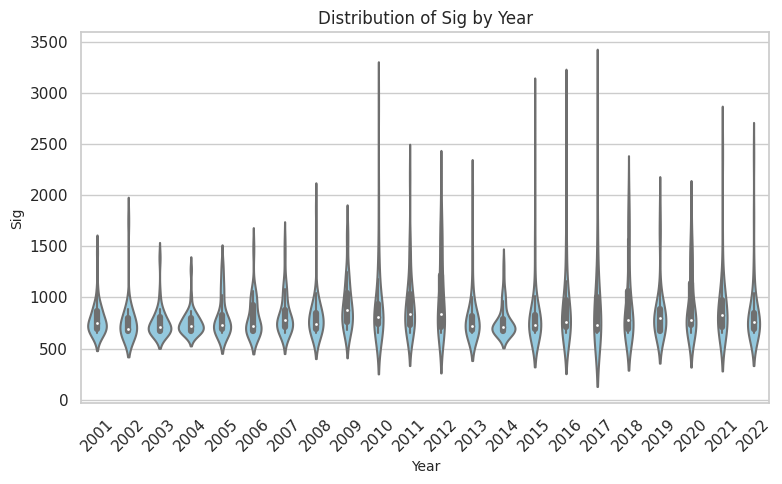

Violin Plot of Earthquake Magnitude by Month:
This violin plot shows the distribution of earthquake magnitudes for each month (1–12). Each violin represents the KDE, with the inner box plot showing the median and IQR. It helps identify any seasonal patterns in earthquake magnitude, such as months with consistently higher or lower magnitudes or multimodal distributions.



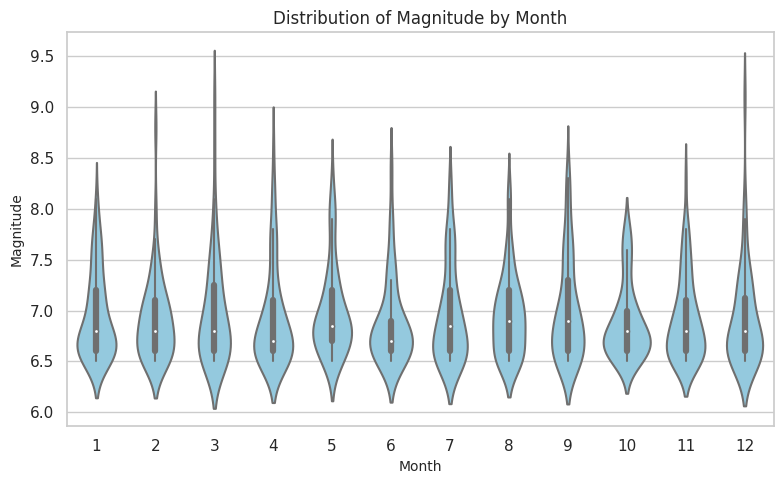

Violin Plot of Earthquake Depth by Month:
This violin plot displays the distribution of earthquake depths (in kilometers) for each month. Each violin shows the KDE, with the inner box plot indicating the median and IQR. It reveals whether certain months have deeper or shallower earthquakes, indicating potential seasonal variations in depth distributions.



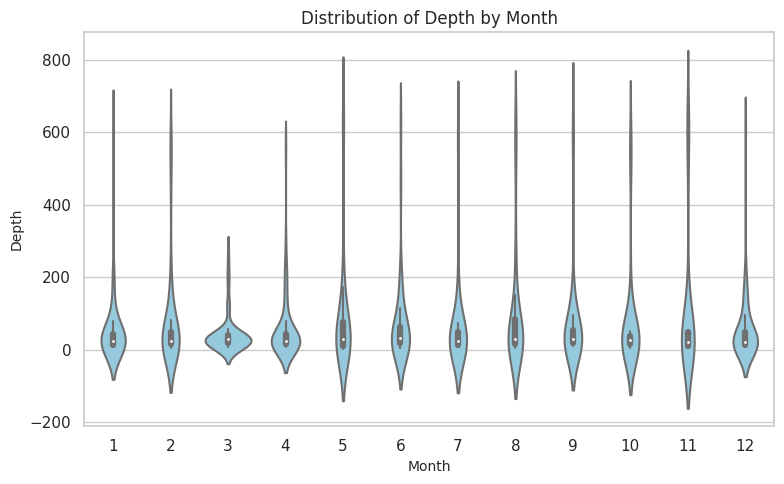

Violin Plot of Community Internet Intensity (CDI) by Month:
This violin plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each month. Each violin represents the KDE, with the inner box plot showing the median and IQR. It indicates whether certain months have higher perceived shaking intensity, revealing potential seasonal patterns in intensity distributions.



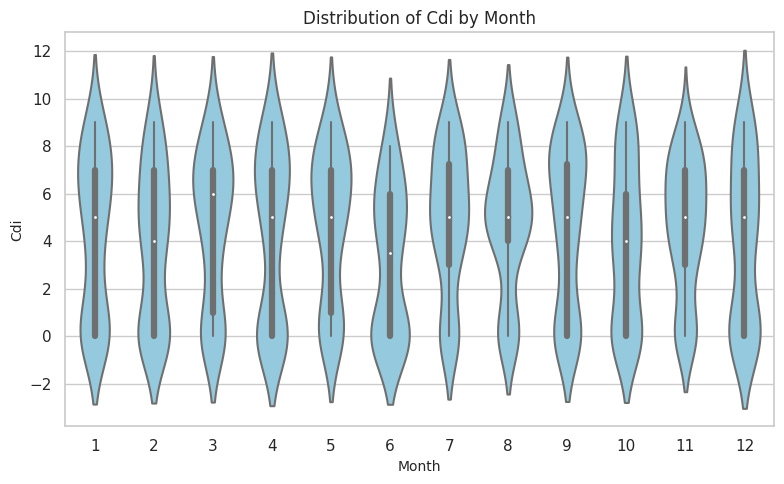

Violin Plot of Modified Mercalli Intensity (MMI) by Month:
This violin plot displays the distribution of MMI values (shaking effects, 1–10) for each month. Each violin shows the KDE, with the inner box plot indicating the median and IQR. It highlights months with more intense earthquake effects, revealing potential seasonal trends or multimodal distributions.



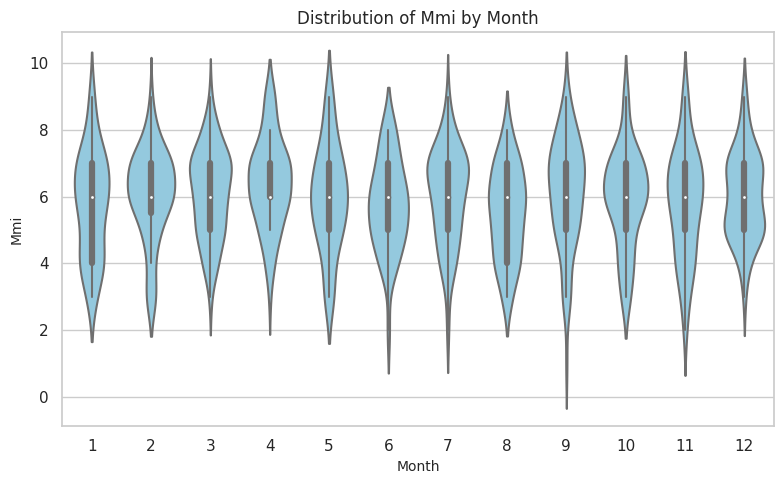

Violin Plot of Earthquake Significance (SIG) by Month:
This violin plot shows the distribution of SIG values (overall impact) for each month. Each violin represents the KDE, with the inner box plot showing the median and IQR. It indicates whether certain months have earthquakes with greater overall impact, suggesting seasonal variations or unique distribution shapes.



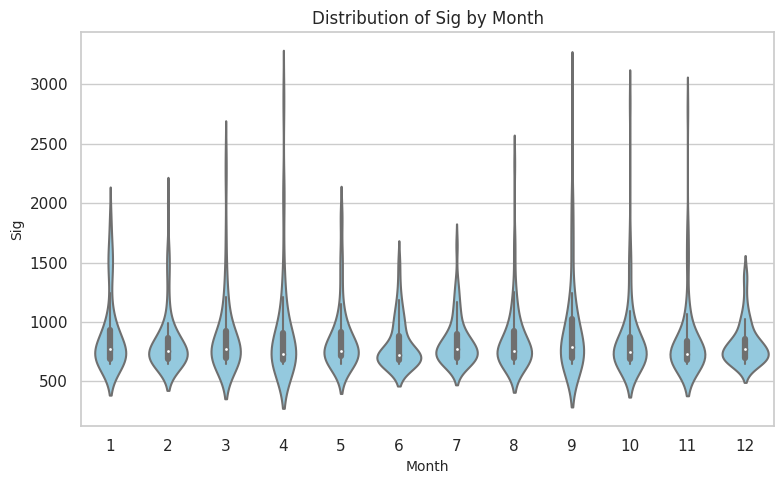

Violin Plot of Earthquake Magnitude by Tsunami Occurrence:
This violin plot shows the distribution of earthquake magnitudes for earthquakes that triggered a tsunami (1) versus those that did not (0). Each violin represents the KDE, with the inner box plot showing the median and IQR. It reveals whether tsunami-generating earthquakes tend to have higher or more variable magnitudes, or distinct distribution shapes.



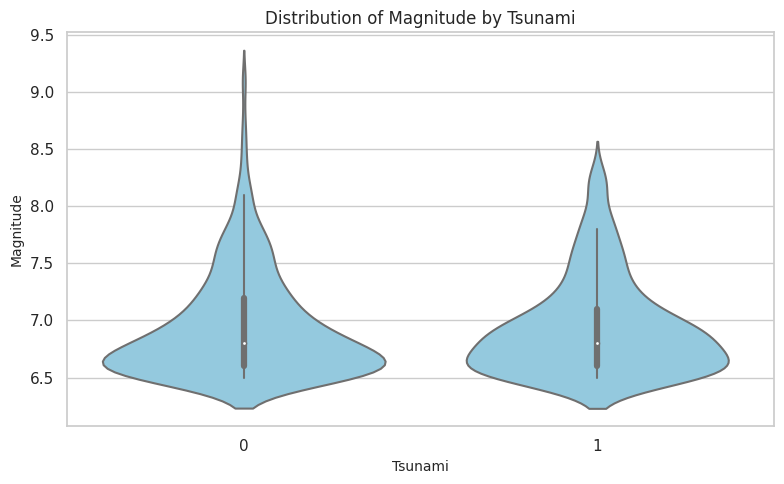

Violin Plot of Earthquake Depth by Tsunami Occurrence:
This violin plot displays the distribution of earthquake depths (in kilometers) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each violin shows the KDE, with the inner box plot indicating the median and IQR. It indicates whether tsunami-generating earthquakes are typically shallower or deeper, which is critical for tsunami risk analysis.



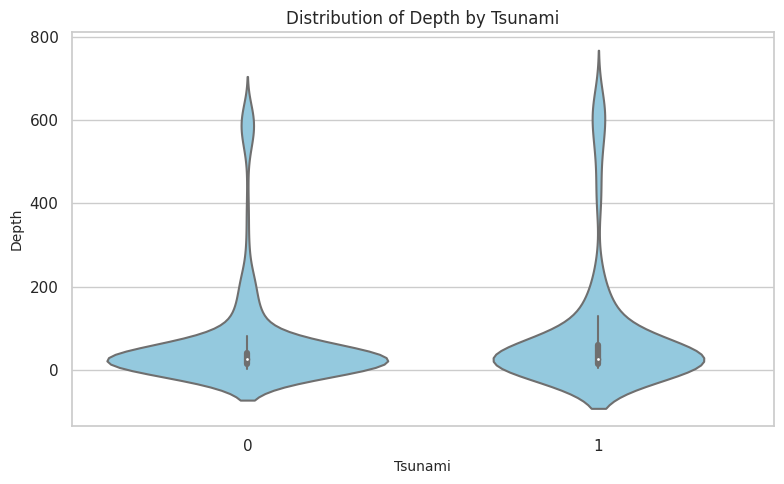

Violin Plot of Community Internet Intensity (CDI) by Tsunami Occurrence:
This violin plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each violin represents the KDE, with the inner box plot showing the median and IQR. It highlights whether tsunami-generating earthquakes have higher perceived shaking intensity or distinct distributions.



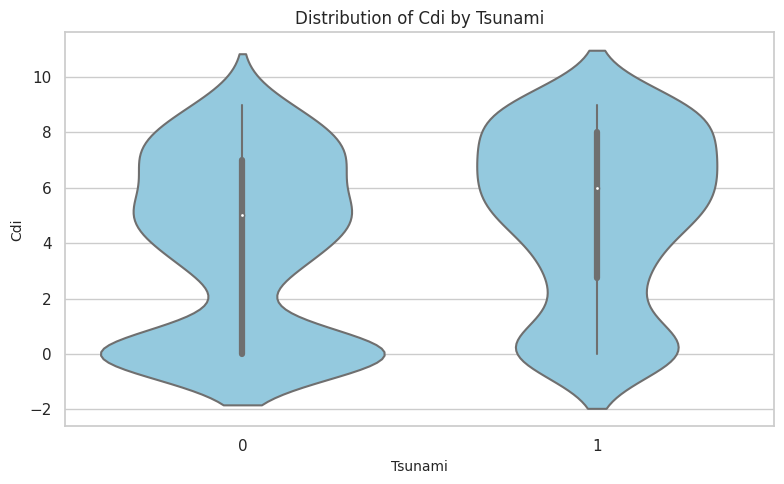

Violin Plot of Modified Mercalli Intensity (MMI) by Tsunami Occurrence:
This violin plot displays the distribution of MMI values (shaking effects, 1–10) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each violin shows the KDE, with the inner box plot indicating the median and IQR. It shows whether tsunami-generating earthquakes have more intense effects or unique distribution shapes.



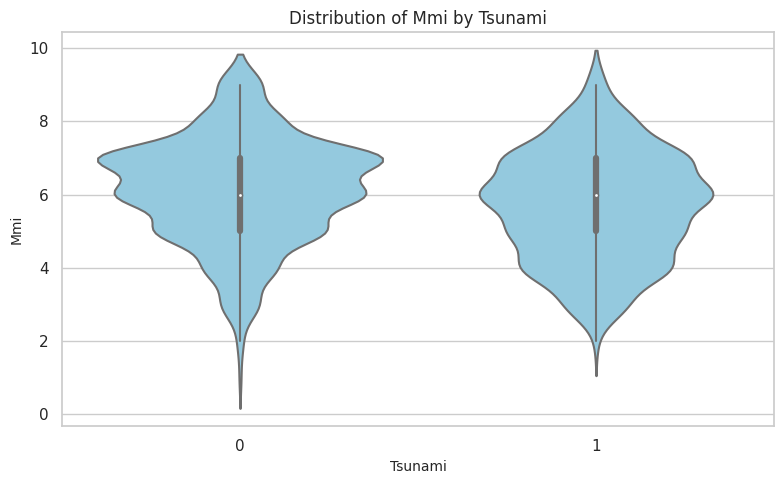

Violin Plot of Earthquake Significance (SIG) by Tsunami Occurrence:
This violin plot shows the distribution of SIG values (overall impact) for earthquakes that triggered a tsunami (1) versus those that did not (0). Each violin represents the KDE, with the inner box plot showing the median and IQR. It indicates whether tsunami-generating earthquakes have greater overall impact or distinct distribution patterns.



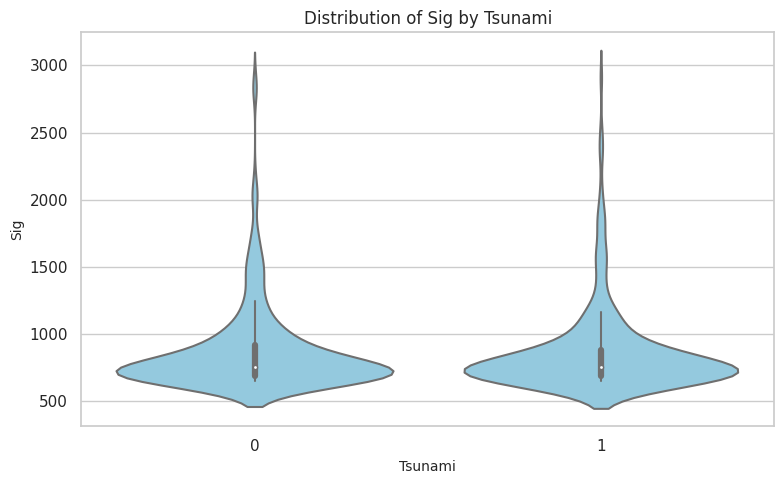

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Categorical and numerical columns
categorical_cols = ['Year', 'Month', 'tsunami']
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']

# Descriptions for violin plots
violinplot_descriptions = {
    ('Year', 'magnitude'): (
        'Violin Plot of Earthquake Magnitude by Year:\n'
        'This violin plot shows the distribution of earthquake magnitudes for each year in the dataset. '
        'Each violin represents the kernel density estimation (KDE) of magnitudes, with wider sections indicating '
        'higher density and the inner box plot showing the median and interquartile range (IQR). This plot reveals '
        'the shape of magnitude distributions, highlighting years with high variability, multimodal patterns, or extreme values.'
    ),
    ('Year', 'depth'): (
        'Violin Plot of Earthquake Depth by Year:\n'
        'This violin plot displays the distribution of earthquake depths (in kilometers) for each year. Each violin '
        'shows the KDE of depths, with the inner box plot indicating the median and IQR. It reveals whether certain years '
        'had predominantly shallow (0–70 km), intermediate (70–300 km), or deep (>300 km) earthquakes, and identifies variability or unusual distributions.'
    ),
    ('Year', 'cdi'): (
        'Violin Plot of Community Internet Intensity (CDI) by Year:\n'
        'This violin plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each year. '
        'Each violin represents the KDE, with the inner box plot showing the median and IQR. It highlights how perceived '
        'shaking intensity varied across years, revealing years with concentrated or diverse intensity distributions.'
    ),
    ('Year', 'mmi'): (
        'Violin Plot of Modified Mercalli Intensity (MMI) by Year:\n'
        'This violin plot displays the distribution of MMI values (shaking effects, 1–10) for each year. Each violin '
        'shows the KDE, with the inner box plot indicating the median and IQR. It reveals variations in earthquake intensity '
        'across years, highlighting years with more severe shaking effects or multimodal distributions.'
    ),
    ('Year', 'sig'): (
        'Violin Plot of Earthquake Significance (SIG) by Year:\n'
        'This violin plot shows the distribution of SIG values (combining magnitude, intensity, and impact) for each year. '
        'Each violin represents the KDE, with the inner box plot showing the median and IQR. It highlights years with higher '
        'or lower overall earthquake impact and identifies unusual distribution shapes or extreme events.'
    ),
    ('Month', 'magnitude'): (
        'Violin Plot of Earthquake Magnitude by Month:\n'
        'This violin plot shows the distribution of earthquake magnitudes for each month (1–12). Each violin represents '
        'the KDE, with the inner box plot showing the median and IQR. It helps identify any seasonal patterns in earthquake '
        'magnitude, such as months with consistently higher or lower magnitudes or multimodal distributions.'
    ),
    ('Month', 'depth'): (
        'Violin Plot of Earthquake Depth by Month:\n'
        'This violin plot displays the distribution of earthquake depths (in kilometers) for each month. Each violin shows '
        'the KDE, with the inner box plot indicating the median and IQR. It reveals whether certain months have deeper or '
        'shallower earthquakes, indicating potential seasonal variations in depth distributions.'
    ),
    ('Month', 'cdi'): (
        'Violin Plot of Community Internet Intensity (CDI) by Month:\n'
        'This violin plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for each month. Each violin '
        'represents the KDE, with the inner box plot showing the median and IQR. It indicates whether certain months have higher '
        'perceived shaking intensity, revealing potential seasonal patterns in intensity distributions.'
    ),
    ('Month', 'mmi'): (
        'Violin Plot of Modified Mercalli Intensity (MMI) by Month:\n'
        'This violin plot displays the distribution of MMI values (shaking effects, 1–10) for each month. Each violin shows '
        'the KDE, with the inner box plot indicating the median and IQR. It highlights months with more intense earthquake '
        'effects, revealing potential seasonal trends or multimodal distributions.'
    ),
    ('Month', 'sig'): (
        'Violin Plot of Earthquake Significance (SIG) by Month:\n'
        'This violin plot shows the distribution of SIG values (overall impact) for each month. Each violin represents the KDE, '
        'with the inner box plot showing the median and IQR. It indicates whether certain months have earthquakes with greater '
        'overall impact, suggesting seasonal variations or unique distribution shapes.'
    ),
    ('tsunami', 'magnitude'): (
        'Violin Plot of Earthquake Magnitude by Tsunami Occurrence:\n'
        'This violin plot shows the distribution of earthquake magnitudes for earthquakes that triggered a tsunami (1) versus '
        'those that did not (0). Each violin represents the KDE, with the inner box plot showing the median and IQR. It reveals '
        'whether tsunami-generating earthquakes tend to have higher or more variable magnitudes, or distinct distribution shapes.'
    ),
    ('tsunami', 'depth'): (
        'Violin Plot of Earthquake Depth by Tsunami Occurrence:\n'
        'This violin plot displays the distribution of earthquake depths (in kilometers) for earthquakes that triggered a tsunami (1) '
        'versus those that did not (0). Each violin shows the KDE, with the inner box plot indicating the median and IQR. It indicates '
        'whether tsunami-generating earthquakes are typically shallower or deeper, which is critical for tsunami risk analysis.'
    ),
    ('tsunami', 'cdi'): (
        'Violin Plot of Community Internet Intensity (CDI) by Tsunami Occurrence:\n'
        'This violin plot shows the distribution of CDI values (perceived shaking intensity, 0–9) for earthquakes that triggered a '
        'tsunami (1) versus those that did not (0). Each violin represents the KDE, with the inner box plot showing the median and IQR. '
        'It highlights whether tsunami-generating earthquakes have higher perceived shaking intensity or distinct distributions.'
    ),
    ('tsunami', 'mmi'): (
        'Violin Plot of Modified Mercalli Intensity (MMI) by Tsunami Occurrence:\n'
        'This violin plot displays the distribution of MMI values (shaking effects, 1–10) for earthquakes that triggered a tsunami (1) '
        'versus those that did not (0). Each violin shows the KDE, with the inner box plot indicating the median and IQR. It shows whether '
        'tsunami-generating earthquakes have more intense effects or unique distribution shapes.'
    ),
    ('tsunami', 'sig'): (
        'Violin Plot of Earthquake Significance (SIG) by Tsunami Occurrence:\n'
        'This violin plot shows the distribution of SIG values (overall impact) for earthquakes that triggered a tsunami (1) versus those '
        'that did not (0). Each violin represents the KDE, with the inner box plot showing the median and IQR. It indicates whether tsunami-generating '
        'earthquakes have greater overall impact or distinct distribution patterns.'
    )
}

# Print violin plot descriptions and create violin plots
print("Violin Plot Descriptions:\n")
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        print(violinplot_descriptions[(cat_col, num_col)] + "\n")
        plt.figure(figsize=(8, 5))
        sns.violinplot(data=data, x=cat_col, y=num_col, color='skyblue', inner='box')
        plt.title(f'Distribution of {num_col.capitalize()} by {cat_col.capitalize()}', fontsize=12)
        plt.xlabel(cat_col.capitalize(), fontsize=10)
        plt.ylabel(num_col.capitalize(), fontsize=10)
        plt.xticks(rotation=45 if cat_col == 'Year' else 0)  # Rotate x-axis labels for Year
        plt.tight_layout()
        plt.show()

Pair Plot of Key Numerical Features with Tsunami as Target:
This pair plot visualizes relationships and distributions for magnitude, depth, cdi, mmi, and sig, with data points colored by tsunami occurrence (0 = No Tsunami, 1 = Tsunami). Diagonal plots show kernel density estimates (KDE) for each feature, split by tsunami, revealing differences in distributions (e.g., higher magnitudes for tsunami earthquakes). Off-diagonal scatter plots show pairwise relationships, with colors indicating tsunami occurrence, highlighting separability or patterns (e.g., magnitude vs. depth clusters). For feature engineering, distinct distributions suggest threshold-based features (e.g., magnitude > 7 for tsunami prediction), while scatter plot patterns suggest interaction terms (e.g., magnitude * depth) or polynomial features (e.g., magnitude^2). Outliers or overlapping regions may indicate the need for feature scaling or robust transformations to improve model performance, especially for tsunami classif

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

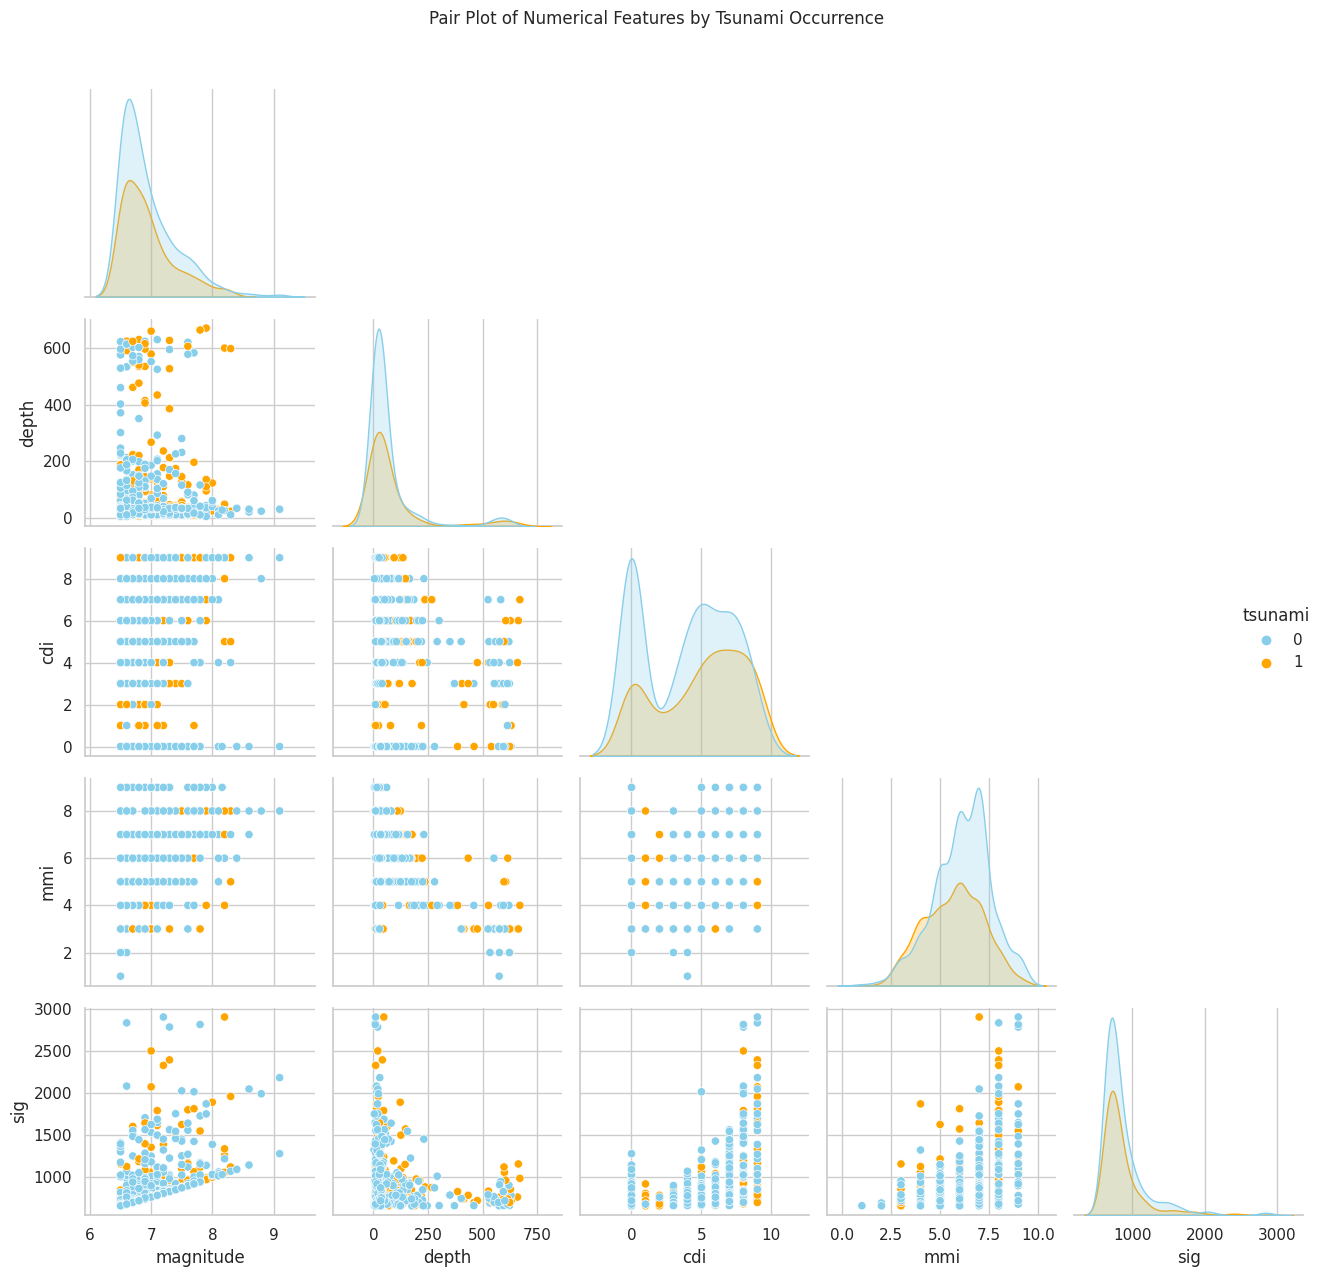

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the CSV content is saved as 'earthquake_data_tsunami.csv'
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Key numerical columns and target column
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
target_col = 'tsunami'

# Description for pair plot
description = (
    'Pair Plot of Key Numerical Features with Tsunami as Target:\n'
    'This pair plot visualizes relationships and distributions for magnitude, depth, cdi, mmi, and sig, with data points colored by tsunami occurrence (0 = No Tsunami, 1 = Tsunami). '
    'Diagonal plots show kernel density estimates (KDE) for each feature, split by tsunami, revealing differences in distributions (e.g., higher magnitudes for tsunami earthquakes). '
    'Off-diagonal scatter plots show pairwise relationships, with colors indicating tsunami occurrence, highlighting separability or patterns (e.g., magnitude vs. depth clusters). '
    'For feature engineering, distinct distributions suggest threshold-based features (e.g., magnitude > 7 for tsunami prediction), while scatter plot patterns suggest interaction terms (e.g., magnitude * depth) or polynomial features (e.g., magnitude^2). '
    'Outliers or overlapping regions may indicate the need for feature scaling or robust transformations to improve model performance, especially for tsunami classification.'
)

# Print description
print(description + "\n")

# Create pair plot
pair_plot = sns.pairplot(
    data=data,
    vars=numerical_cols,
    hue=target_col,
    diag_kind='kde',
    palette={0: 'skyblue', 1: 'orange'},
    corner=True
)
pair_plot.fig.suptitle('Pair Plot of Numerical Features by Tsunami Occurrence', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

Correlation Heatmap of Numerical Features:
This heatmap shows the Pearson correlation coefficients between numerical features (magnitude, depth, cdi, mmi, sig, nst, dmin, gap, latitude, longitude, Year, Month). Values range from -1 to 1, with darker colors indicating stronger correlations (positive or negative). High correlations (e.g., between magnitude and sig) suggest potential redundancy, where one feature could be dropped or combined (e.g., magnitude * sig). Low correlations (e.g., depth with others) indicate independent features that may be valuable for modeling. This plot guides feature selection and the creation of interaction terms for highly correlated pairs.



/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


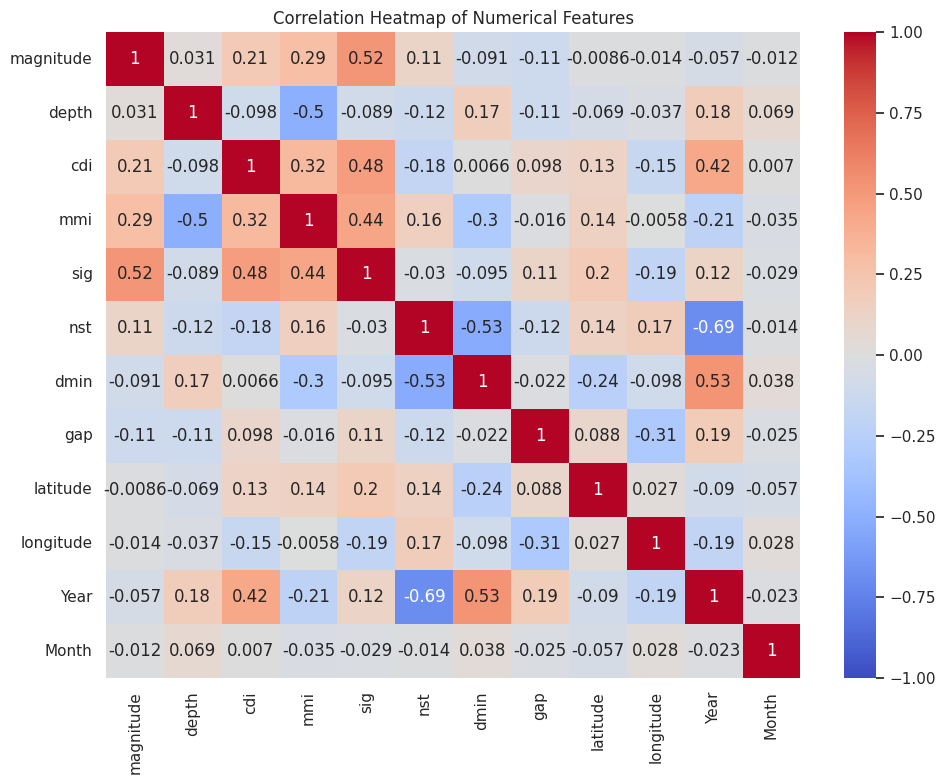

Scatter Plot of Magnitude over Year:
This scatter plot shows earthquake magnitudes over years, with a regression line to highlight trends. Temporal patterns (e.g., increasing or decreasing magnitude) suggest time-based features like year bins (e.g., pre-2000 vs. post-2000) or a trend indicator. Outliers may indicate significant events for separate feature encoding. This plot informs temporal feature engineering.



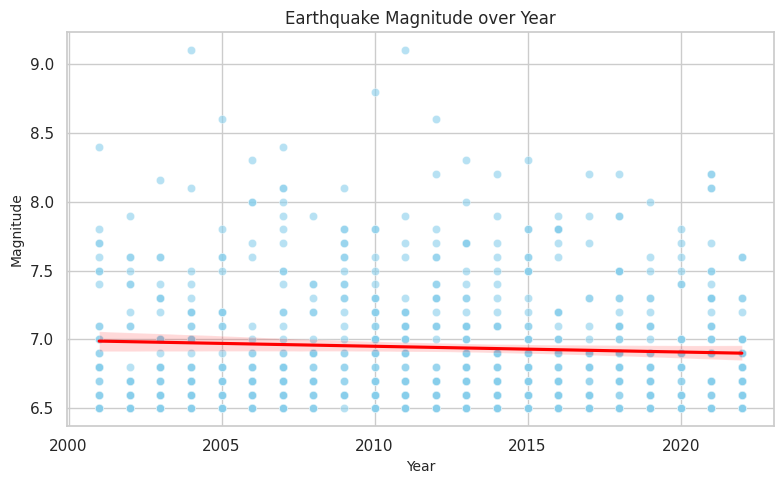

Scatter Plot of Depth over Year:
This scatter plot shows earthquake depths over years, with a regression line to highlight trends. Trends in depth (e.g., more shallow earthquakes in recent years) suggest features like depth bins or year-depth interactions. This plot helps create time-based features for modeling earthquake characteristics.



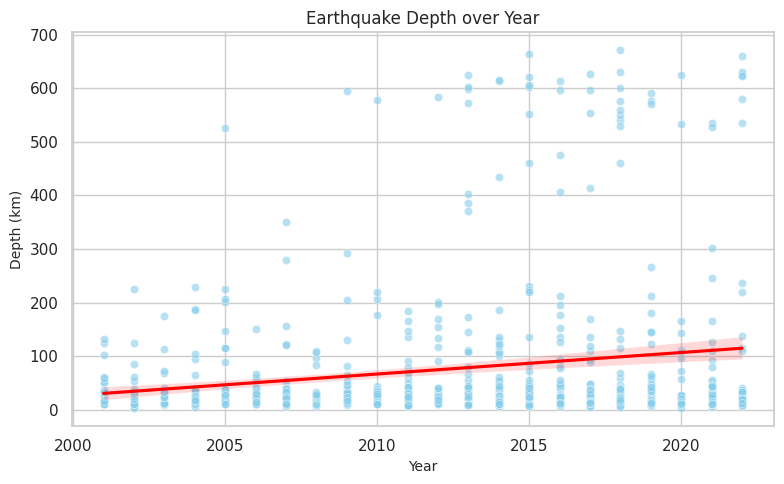

Bar Plot of Tsunami Occurrence by Binned Magnitude:
This bar plot shows the proportion of tsunami occurrences across binned magnitude levels (e.g., <6.5, 6.5–7.5, >7.5). Higher tsunami proportions in certain bins suggest discretizing magnitude into categorical features for modeling. This plot informs feature engineering by identifying magnitude thresholds that predict tsunami occurrence.



/tmp/ipykernel_37/711803587.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tsunami_prop = data.groupby('magnitude_bin')['tsunami'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


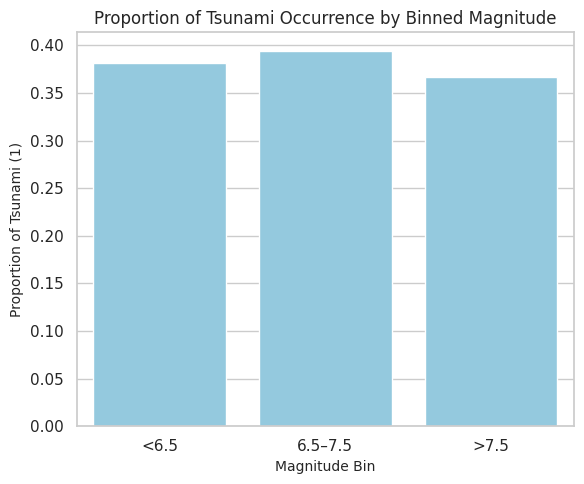

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Key numerical columns for analysis
numerical_cols = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
categorical_col = 'tsunami'

# Descriptions for feature engineering plots
descriptions = {
    'correlation_heatmap': (
        'Correlation Heatmap of Numerical Features:\n'
        'This heatmap shows the Pearson correlation coefficients between numerical features (magnitude, depth, cdi, mmi, sig, nst, dmin, gap, latitude, longitude, Year, Month). '
        'Values range from -1 to 1, with darker colors indicating stronger correlations (positive or negative). '
        'High correlations (e.g., between magnitude and sig) suggest potential redundancy, where one feature could be dropped or combined (e.g., magnitude * sig). '
        'Low correlations (e.g., depth with others) indicate independent features that may be valuable for modeling. '
        'This plot guides feature selection and the creation of interaction terms for highly correlated pairs.'
    ),
    'magnitude_year': (
        'Scatter Plot of Magnitude over Year:\n'
        'This scatter plot shows earthquake magnitudes over years, with a regression line to highlight trends. '
        'Temporal patterns (e.g., increasing or decreasing magnitude) suggest time-based features like year bins (e.g., pre-2000 vs. post-2000) or a trend indicator. '
        'Outliers may indicate significant events for separate feature encoding. This plot informs temporal feature engineering.'
    ),
    'depth_year': (
        'Scatter Plot of Depth over Year:\n'
        'This scatter plot shows earthquake depths over years, with a regression line to highlight trends. '
        'Trends in depth (e.g., more shallow earthquakes in recent years) suggest features like depth bins or year-depth interactions. '
        'This plot helps create time-based features for modeling earthquake characteristics.'
    ),
    'binned_magnitude_tsunami': (
        'Bar Plot of Tsunami Occurrence by Binned Magnitude:\n'
        'This bar plot shows the proportion of tsunami occurrences across binned magnitude levels (e.g., <6.5, 6.5–7.5, >7.5). '
        'Higher tsunami proportions in certain bins suggest discretizing magnitude into categorical features for modeling. '
        'This plot informs feature engineering by identifying magnitude thresholds that predict tsunami occurrence.'
    )
}

# 1. Correlation Heatmap
print(descriptions['correlation_heatmap'] + "\n")
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_cols + ['nst', 'dmin', 'gap', 'latitude', 'longitude', 'Year', 'Month']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Time-Based Scatter Plots
print(descriptions['magnitude_year'] + "\n")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Year', y='magnitude', color='skyblue', alpha=0.6)
sns.regplot(data=data, x='Year', y='magnitude', scatter=False, color='red')
plt.title('Earthquake Magnitude over Year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Magnitude', fontsize=10)
plt.tight_layout()
plt.show()

print(descriptions['depth_year'] + "\n")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Year', y='depth', color='skyblue', alpha=0.6)
sns.regplot(data=data, x='Year', y='depth', scatter=False, color='red')
plt.title('Earthquake Depth over Year', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Depth (km)', fontsize=10)
plt.tight_layout()
plt.show()

# 3. Binned Magnitude vs. Tsunami Bar Plot
print(descriptions['binned_magnitude_tsunami'] + "\n")
# Create magnitude bins
data['magnitude_bin'] = pd.cut(data['magnitude'], bins=[0, 6.5, 7.5, 10], labels=['<6.5', '6.5–7.5', '>7.5'])
tsunami_prop = data.groupby('magnitude_bin')['tsunami'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=tsunami_prop, x='magnitude_bin', y='tsunami', color='skyblue')
plt.title('Proportion of Tsunami Occurrence by Binned Magnitude', fontsize=12)
plt.xlabel('Magnitude Bin', fontsize=10)
plt.ylabel('Proportion of Tsunami (1)', fontsize=10)
plt.tight_layout()
plt.show()

🌍 Forecast of Mean Earthquake Magnitude Over Future Years 📈
This line plot shows the historical mean earthquake magnitude per year (blue line) and a 5-year forecast (2026–2030, orange line) with confidence intervals (shaded area). The forecast uses Exponential Smoothing to capture trends in magnitude. Rising or falling trends suggest changes in earthquake severity, which can inform feature engineering (e.g., year-based features or magnitude thresholds). The confidence intervals indicate uncertainty, helping assess reliability for tsunami prediction models. 🌊



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


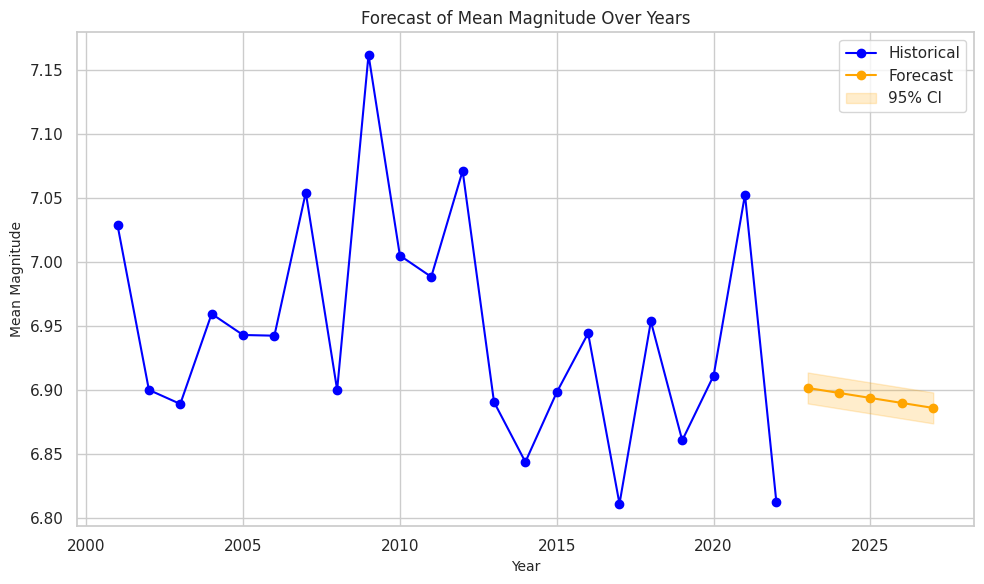

🌍 Forecast of Mean Earthquake Depth Over Future Years 📈
This line plot displays the historical mean earthquake depth (in kilometers) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. The forecast uses Exponential Smoothing to model trends in depth. Trends toward shallower depths (<70 km) may increase tsunami risk, suggesting features like depth bins or interactions (e.g., depth * year). The plot aids in planning for future seismic risk assessments. 🌊



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


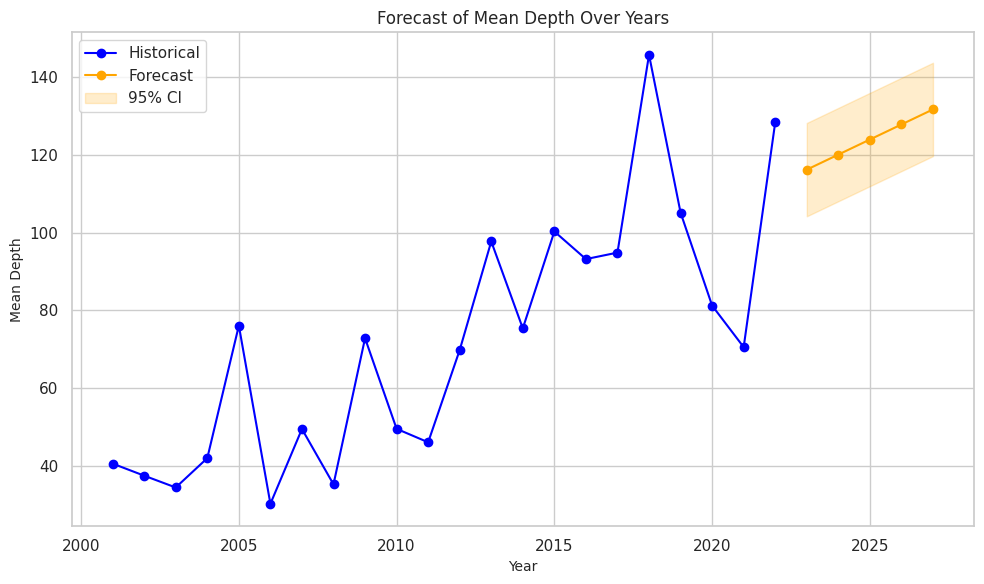

🌍 Forecast of Mean CDI Over Future Years 📈
This line plot shows the historical mean Community Internet Intensity (CDI, 0–9) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. The forecast uses Exponential Smoothing to predict perceived shaking intensity trends. Increasing CDI trends may indicate stronger public impacts, guiding features like CDI thresholds for tsunami models. The plot helps anticipate future shaking intensity patterns. 🌊



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


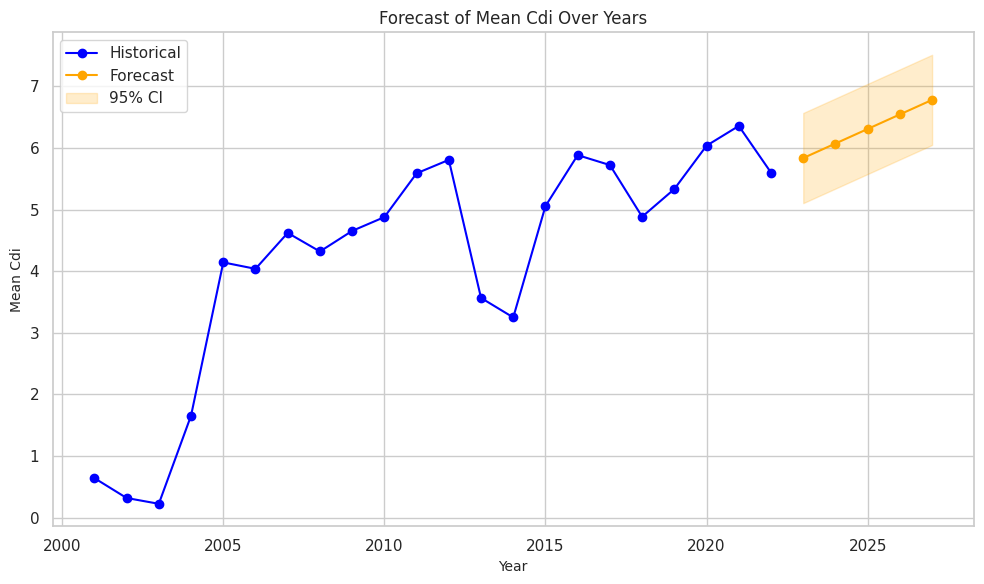

🌍 Forecast of Mean MMI Over Future Years 📈
This line plot displays the historical mean Modified Mercalli Intensity (MMI, 1–10) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. The forecast uses Exponential Smoothing to model trends in shaking effects. Rising MMI suggests more severe impacts, informing features like MMI-based thresholds or temporal flags. This plot supports planning for earthquake impact mitigation. 🌊



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


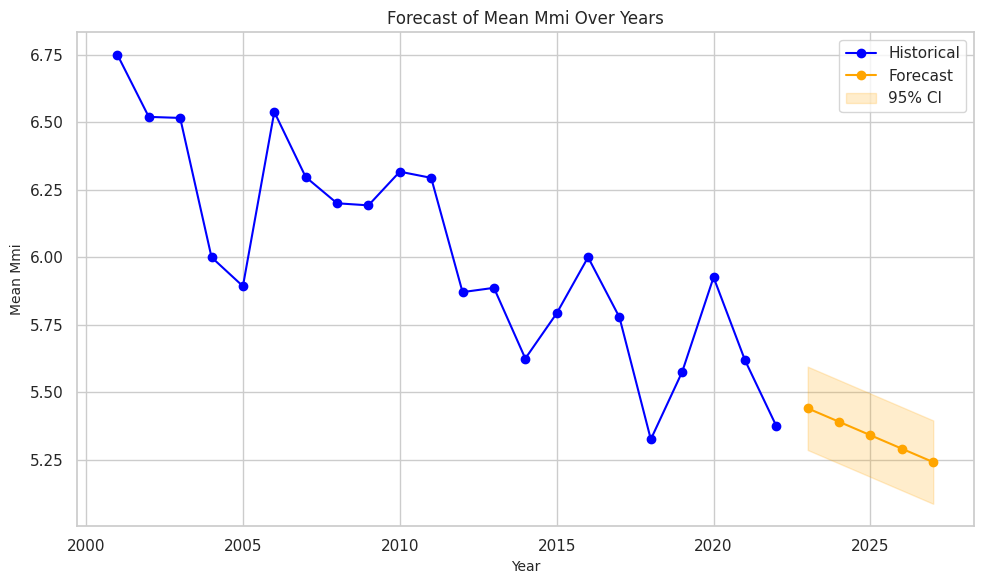

🌍 Forecast of Mean SIG Over Future Years 📈
This line plot shows the historical mean Significance (SIG) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. The forecast uses Exponential Smoothing to predict trends in overall earthquake impact. Increasing SIG trends suggest higher impact events, guiding features like SIG thresholds or interactions (e.g., SIG * year). The plot aids in forecasting earthquake significance for tsunami risk. 🌊



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


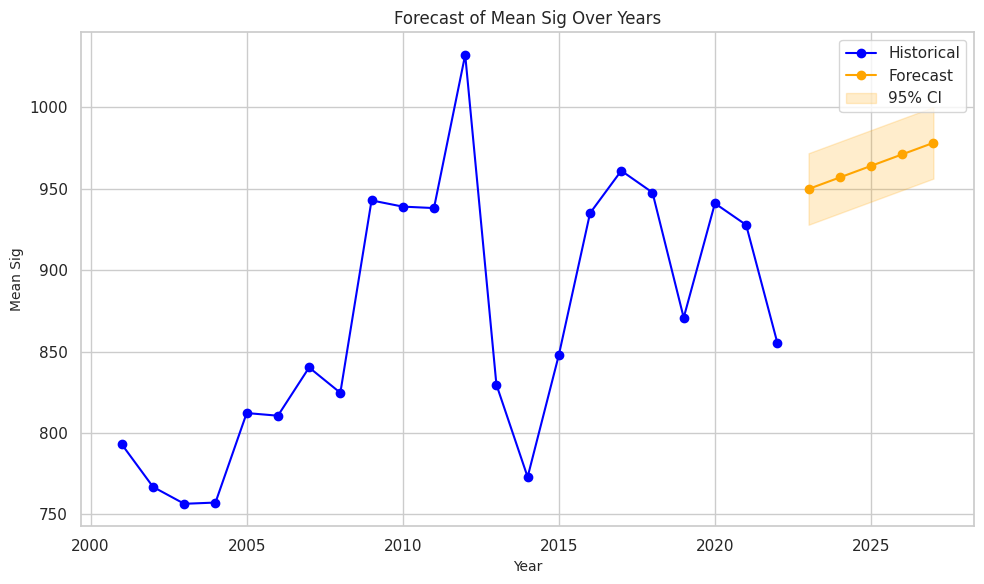

🌍 Forecast of Tsunami Proportion Over Future Years 📈
This line plot shows the historical proportion of earthquakes causing tsunamis per year (blue line) and a 5-year forecast (orange line) with confidence intervals. The forecast uses Exponential Smoothing to predict trends in tsunami likelihood. Rising proportions indicate increasing tsunami risk, suggesting temporal features (e.g., high-risk year bins) for predictive models. This plot is critical for planning tsunami early warning systems. 🌊



An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
No supported index is available. Prediction results will be given with an integer index beginning at `start`.
No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.


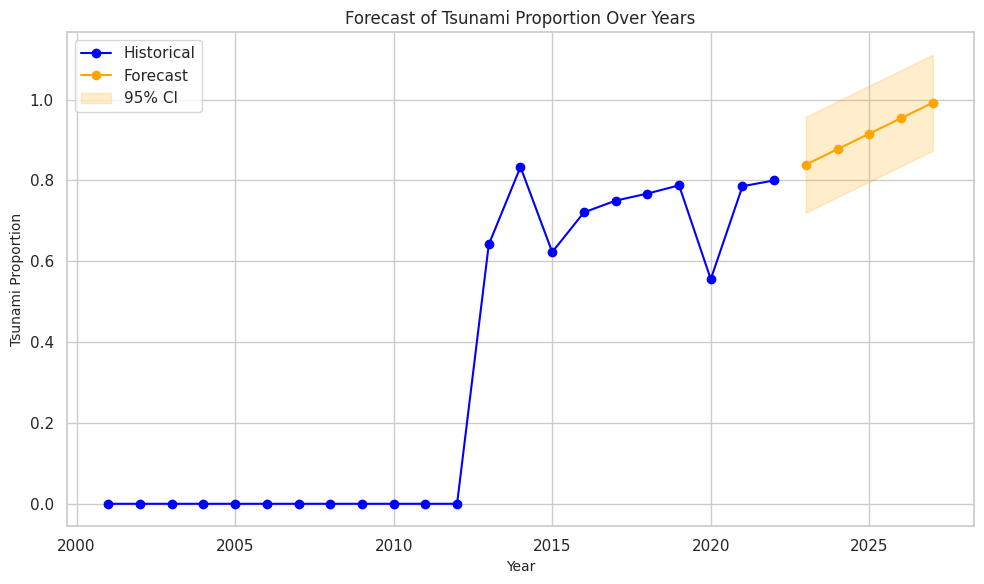

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Set the style for better visualization
sns.set(style="whitegrid")

# Aggregate data by Year for numerical features and tsunami proportion
agg_data = data.groupby('Year').agg({
    'magnitude': 'mean',
    'depth': 'mean',
    'cdi': 'mean',
    'mmi': 'mean',
    'sig': 'mean',
    'tsunami': 'mean'  # Proportion of tsunami occurrences (0/1 binary, so mean = proportion)
}).reset_index()

# Set Year as index for time series forecasting
agg_data.set_index('Year', inplace=True)

# Forecasting parameters
forecast_horizon = 5  # Forecast 5 years into the future (2026–2030)
columns_to_forecast = ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'tsunami']

# Descriptions for forecast plots
descriptions = {
    'magnitude': (
        '🌍 Forecast of Mean Earthquake Magnitude Over Future Years 📈\n'
        'This line plot shows the historical mean earthquake magnitude per year (blue line) and a 5-year forecast (2026–2030, orange line) with confidence intervals (shaded area). '
        'The forecast uses Exponential Smoothing to capture trends in magnitude. '
        'Rising or falling trends suggest changes in earthquake severity, which can inform feature engineering (e.g., year-based features or magnitude thresholds). '
        'The confidence intervals indicate uncertainty, helping assess reliability for tsunami prediction models. 🌊'
    ),
    'depth': (
        '🌍 Forecast of Mean Earthquake Depth Over Future Years 📈\n'
        'This line plot displays the historical mean earthquake depth (in kilometers) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. '
        'The forecast uses Exponential Smoothing to model trends in depth. '
        'Trends toward shallower depths (<70 km) may increase tsunami risk, suggesting features like depth bins or interactions (e.g., depth * year). '
        'The plot aids in planning for future seismic risk assessments. 🌊'
    ),
    'cdi': (
        '🌍 Forecast of Mean CDI Over Future Years 📈\n'
        'This line plot shows the historical mean Community Internet Intensity (CDI, 0–9) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. '
        'The forecast uses Exponential Smoothing to predict perceived shaking intensity trends. '
        'Increasing CDI trends may indicate stronger public impacts, guiding features like CDI thresholds for tsunami models. '
        'The plot helps anticipate future shaking intensity patterns. 🌊'
    ),
    'mmi': (
        '🌍 Forecast of Mean MMI Over Future Years 📈\n'
        'This line plot displays the historical mean Modified Mercalli Intensity (MMI, 1–10) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. '
        'The forecast uses Exponential Smoothing to model trends in shaking effects. '
        'Rising MMI suggests more severe impacts, informing features like MMI-based thresholds or temporal flags. '
        'This plot supports planning for earthquake impact mitigation. 🌊'
    ),
    'sig': (
        '🌍 Forecast of Mean SIG Over Future Years 📈\n'
        'This line plot shows the historical mean Significance (SIG) per year (blue line) and a 5-year forecast (orange line) with confidence intervals. '
        'The forecast uses Exponential Smoothing to predict trends in overall earthquake impact. '
        'Increasing SIG trends suggest higher impact events, guiding features like SIG thresholds or interactions (e.g., SIG * year). '
        'The plot aids in forecasting earthquake significance for tsunami risk. 🌊'
    ),
    'tsunami': (
        '🌍 Forecast of Tsunami Proportion Over Future Years 📈\n'
        'This line plot shows the historical proportion of earthquakes causing tsunamis per year (blue line) and a 5-year forecast (orange line) with confidence intervals. '
        'The forecast uses Exponential Smoothing to predict trends in tsunami likelihood. '
        'Rising proportions indicate increasing tsunami risk, suggesting temporal features (e.g., high-risk year bins) for predictive models. '
        'This plot is critical for planning tsunami early warning systems. 🌊'
    )
}

# Create forecast plots
for col in columns_to_forecast:
    print(descriptions[col] + "\n")
    
    # Fit Exponential Smoothing model
    model = ExponentialSmoothing(agg_data[col], trend='add', seasonal=None)
    fit = model.fit()
    
    # Forecast for next 5 years
    forecast = fit.forecast(steps=forecast_horizon)
    forecast_years = range(int(agg_data.index.max()) + 1, int(agg_data.index.max()) + forecast_horizon + 1)
    
    # Compute confidence intervals (approximate using standard error)
    forecast_std = fit.forecast(steps=forecast_horizon).std()
    ci_lower = forecast - 1.96 * forecast_std
    ci_upper = forecast + 1.96 * forecast_std
    
    # Plot historical and forecast data
    plt.figure(figsize=(10, 6))
    # Historical data
    plt.plot(agg_data.index, agg_data[col], color='blue', label='Historical', marker='o')
    # Forecast data
    plt.plot(forecast_years, forecast, color='orange', label='Forecast', marker='o')
    # Confidence intervals
    plt.fill_between(forecast_years, ci_lower, ci_upper, color='orange', alpha=0.2, label='95% CI')
    
    plt.title(f'Forecast of Mean {col.capitalize()} Over Years' if col != 'tsunami' else 'Forecast of Tsunami Proportion Over Years', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel(f'Mean {col.capitalize()}' if col != 'tsunami' else 'Tsunami Proportion', fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()

2025-10-11 04:07:30.635586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760155650.886992      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760155650.956967      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shap

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model Descriptions and Actual vs Predicted Plots (Confusion Matrices):

Logistic Regression Model:
This is a basic linear classifier that models the probability of tsunami occurrence using a logistic function. It is suitable for binary classification and provides interpretable coefficients for feature importance. The confusion matrix shows true positives, false positives, true negatives, and false negatives, indicating model performance in predicting tsunamis.



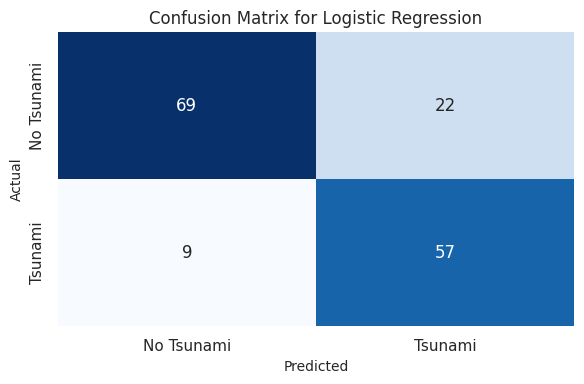

Decision Tree Model:
This model builds a tree-like structure to make decisions based on feature splits, capturing non-linear relationships. It is prone to overfitting but easy to interpret. The confusion matrix highlights how well it classifies tsunami vs. non-tsunami earthquakes.



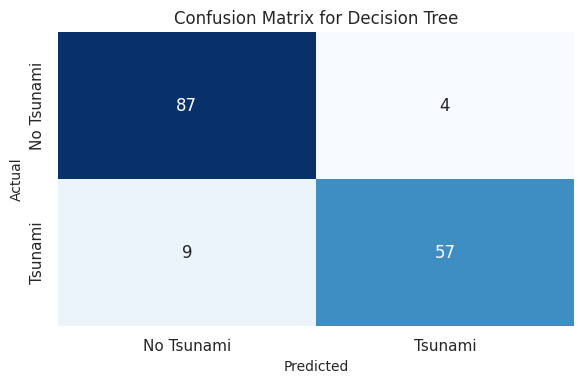

Random Forest Model:
An ensemble of decision trees that reduces overfitting by averaging predictions. It handles non-linearity and feature interactions well. The confusion matrix shows improved performance over a single tree in predicting tsunami occurrence.



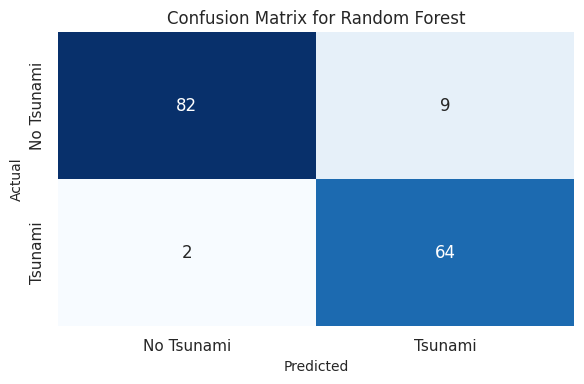

Support Vector Machine (SVM) Model:
This model finds a hyperplane that best separates classes in a high-dimensional space, effective for non-linear data with kernels. It uses scaled features for better performance. The confusion matrix indicates its ability to distinguish tsunami-generating earthquakes.



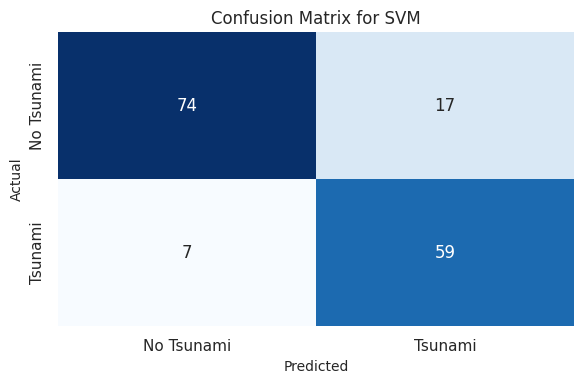

XGBoost Model:
An advanced gradient boosting model that optimizes decision trees sequentially for high accuracy and speed. It handles imbalanced data well. The confusion matrix shows its effectiveness in tsunami prediction.



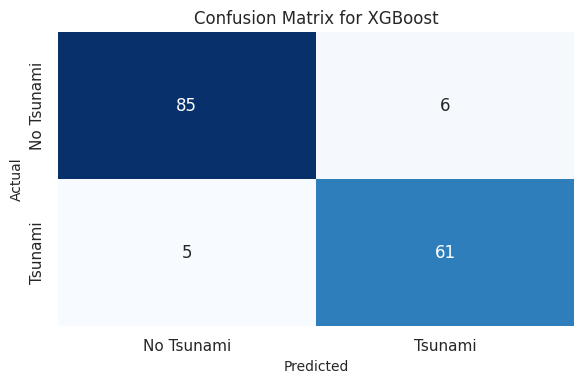

Multi-Layer Perceptron (MLP) Model:
A neural network classifier with hidden layers, capable of learning complex patterns. It uses scaled features. The confusion matrix reveals its performance in classifying earthquakes based on tsunami occurrence.



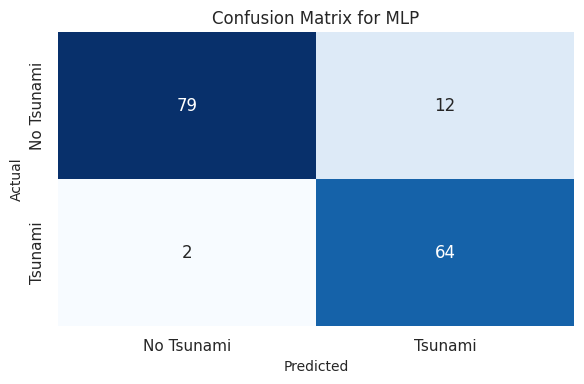

Keras Neural Network Model:
An advanced deep learning model built with Keras, featuring multiple hidden layers for capturing intricate patterns. It uses scaled features and sigmoid output for binary classification. The confusion matrix shows its predictive accuracy for tsunamis.



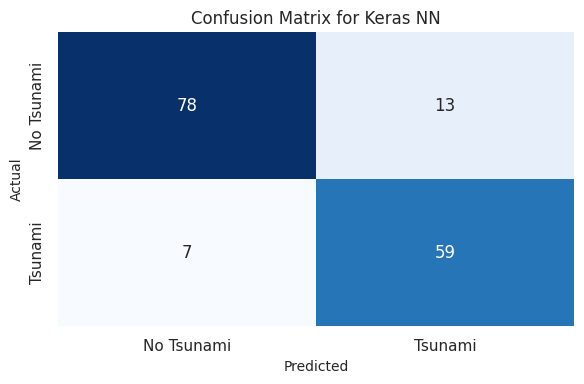

Model Accuracy Comparison:
This bar plot compares the accuracy scores of all models on the test set. Accuracy is the proportion of correct predictions (both tsunami and non-tsunami). Higher bars indicate better overall performance. This helps select the best model for tsunami prediction.



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


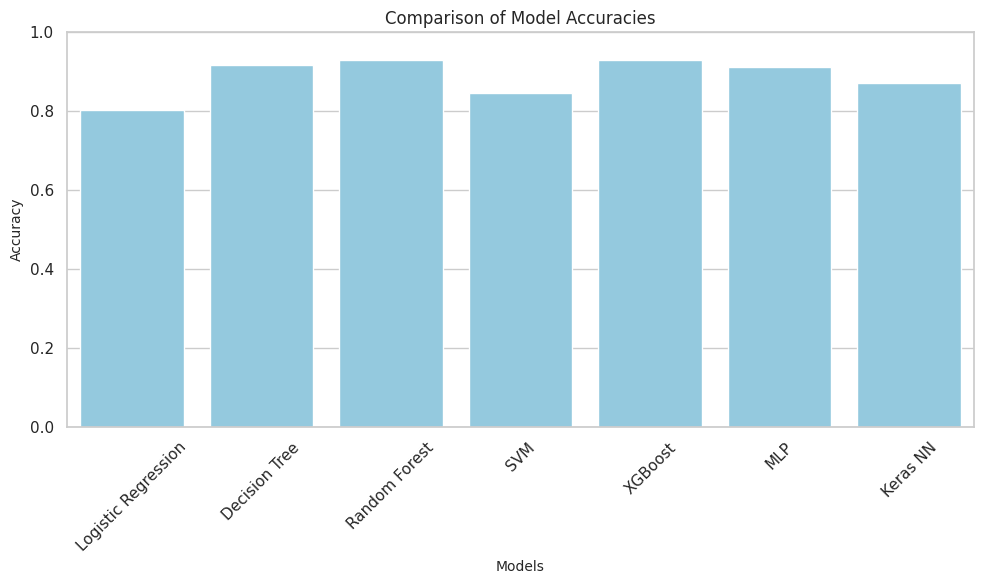

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Prepare features and target
features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month']
X = data[features]
y = data['tsunami']

# Handle missing values if any (assuming clean data, but fill with mean for safety)
X = X.fillna(X.mean())

# Scale features for models that require it (e.g., SVM, MLP, Keras)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'MLP': MLPClassifier(random_state=42, max_iter=1000)
}

# Train, predict, and evaluate models
accuracies = {}
confusion_matrices = {}

for name, model in models.items():
    if name in ['SVM', 'MLP']:  # Use scaled data for these
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Keras Neural Network (Advanced)
def create_keras_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_model = create_keras_model(X_train_scaled.shape[1])
keras_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
y_pred_keras = (keras_model.predict(X_test_scaled) > 0.5).astype(int).flatten()
accuracies['Keras NN'] = accuracy_score(y_test, y_pred_keras)
confusion_matrices['Keras NN'] = confusion_matrix(y_test, y_pred_keras)

# Print descriptions and plot confusion matrices
descriptions = {
    'Logistic Regression': (
        'Logistic Regression Model:\n'
        'This is a basic linear classifier that models the probability of tsunami occurrence using a logistic function. '
        'It is suitable for binary classification and provides interpretable coefficients for feature importance. '
        'The confusion matrix shows true positives, false positives, true negatives, and false negatives, indicating model performance in predicting tsunamis.'
    ),
    'Decision Tree': (
        'Decision Tree Model:\n'
        'This model builds a tree-like structure to make decisions based on feature splits, capturing non-linear relationships. '
        'It is prone to overfitting but easy to interpret. The confusion matrix highlights how well it classifies tsunami vs. non-tsunami earthquakes.'
    ),
    'Random Forest': (
        'Random Forest Model:\n'
        'An ensemble of decision trees that reduces overfitting by averaging predictions. It handles non-linearity and feature interactions well. '
        'The confusion matrix shows improved performance over a single tree in predicting tsunami occurrence.'
    ),
    'SVM': (
        'Support Vector Machine (SVM) Model:\n'
        'This model finds a hyperplane that best separates classes in a high-dimensional space, effective for non-linear data with kernels. '
        'It uses scaled features for better performance. The confusion matrix indicates its ability to distinguish tsunami-generating earthquakes.'
    ),
    'XGBoost': (
        'XGBoost Model:\n'
        'An advanced gradient boosting model that optimizes decision trees sequentially for high accuracy and speed. '
        'It handles imbalanced data well. The confusion matrix shows its effectiveness in tsunami prediction.'
    ),
    'MLP': (
        'Multi-Layer Perceptron (MLP) Model:\n'
        'A neural network classifier with hidden layers, capable of learning complex patterns. It uses scaled features. '
        'The confusion matrix reveals its performance in classifying earthquakes based on tsunami occurrence.'
    ),
    'Keras NN': (
        'Keras Neural Network Model:\n'
        'An advanced deep learning model built with Keras, featuring multiple hidden layers for capturing intricate patterns. '
        'It uses scaled features and sigmoid output for binary classification. The confusion matrix shows its predictive accuracy for tsunamis.'
    )
}

print("Model Descriptions and Actual vs Predicted Plots (Confusion Matrices):\n")
for name in accuracies.keys():
    print(descriptions[name] + "\n")
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[name], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Tsunami', 'Tsunami'], yticklabels=['No Tsunami', 'Tsunami'])
    plt.title(f'Confusion Matrix for {name}', fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    plt.tight_layout()
    plt.show()

# Model Accuracy Comparison Plot
print("Model Accuracy Comparison:\n"
      "This bar plot compares the accuracy scores of all models on the test set. "
      "Accuracy is the proportion of correct predictions (both tsunami and non-tsunami). "
      "Higher bars indicate better overall performance. This helps select the best model for tsunami prediction.\n")

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), color='skyblue')
plt.title('Comparison of Model Accuracies', fontsize=12)
plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Logistic Regression Coefficients Plot:
This bar plot shows the absolute values of the coefficients from the Logistic Regression model, indicating the importance of each feature in predicting tsunami occurrence. Larger coefficients suggest stronger influence on the prediction (positive or negative). Features like magnitude or depth with high coefficients are key drivers and may be prioritized for feature engineering (e.g., interaction terms like magnitude * depth). Scaled features ensure fair comparison. This plot helps identify features to retain or transform for tsunami prediction.



unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


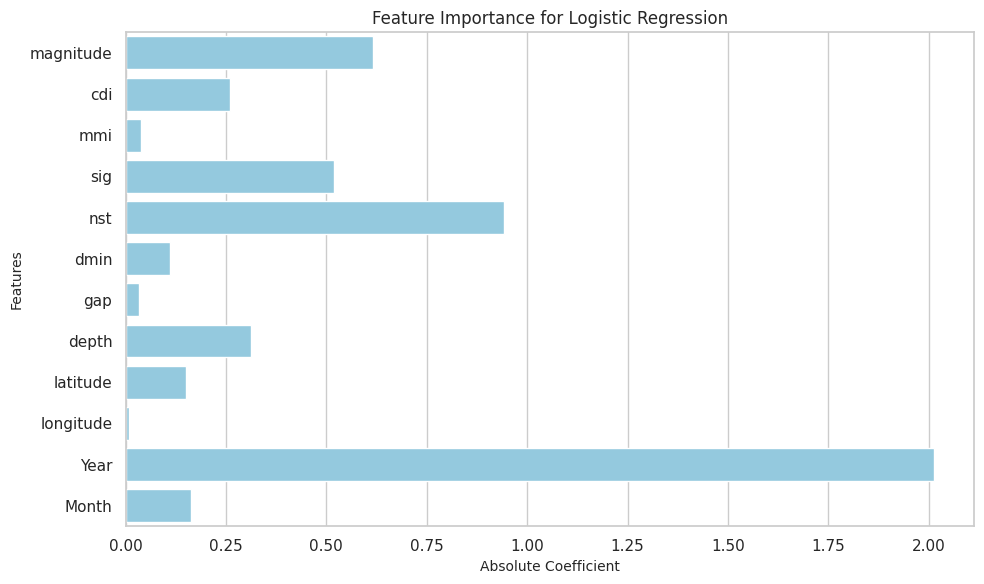

Decision Tree Feature Importance Plot:
This bar plot displays feature importance based on the reduction in node impurity (e.g., Gini) in the Decision Tree model. Higher values indicate features that are more critical for splitting data to predict tsunamis. Features like magnitude or depth with high importance are key for classification and may suggest creating derived features (e.g., binned magnitude). This plot guides feature selection by highlighting influential variables.



unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


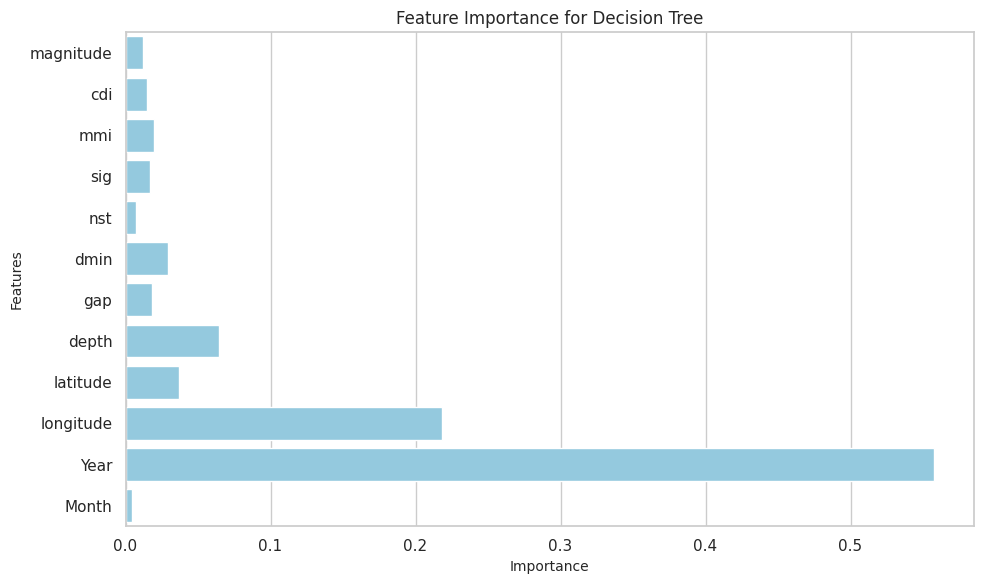

Random Forest Feature Importance Plot:
This bar plot shows feature importance based on the mean decrease in impurity across all trees in the Random Forest model. Higher values indicate features that consistently contribute to accurate tsunami predictions. Features like magnitude, sig, or depth with high importance suggest they are strong predictors and candidates for engineering (e.g., polynomial features like magnitude^2). This plot helps prioritize features for modeling and transformation.



unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


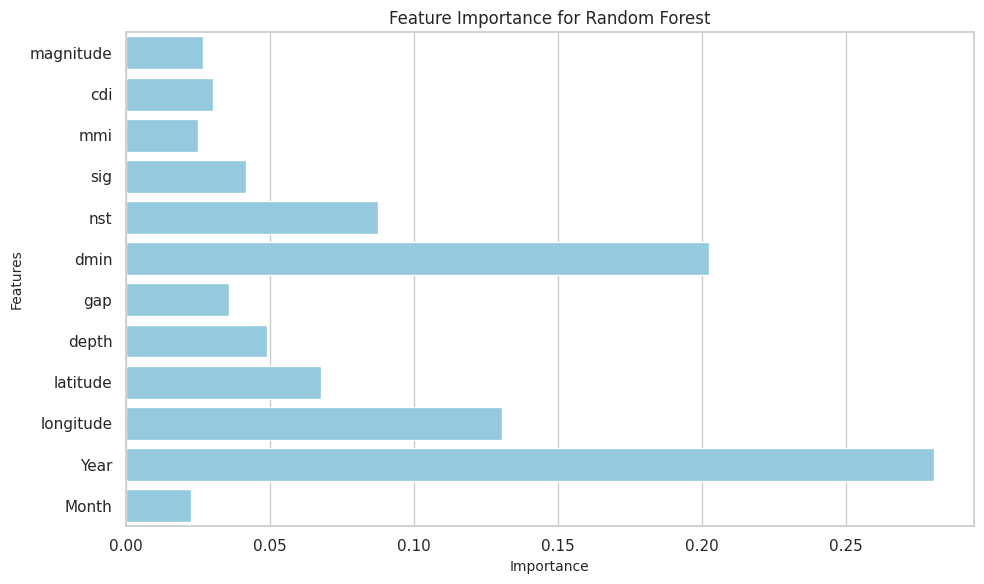

XGBoost Feature Importance Plot:
This bar plot displays feature importance based on the gain (improvement in model performance) from splits involving each feature in the XGBoost model. Higher values indicate features critical for predicting tsunami occurrence. Features like magnitude or depth with high importance are key for model performance and may be used for creating interaction terms (e.g., magnitude * depth) or thresholds. This plot informs feature selection and engineering for improved predictions.



unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


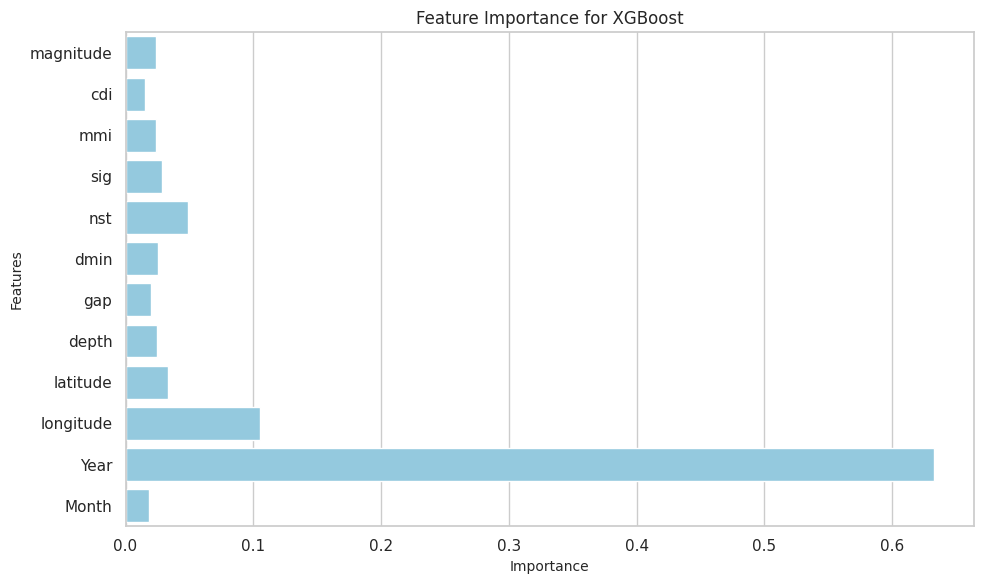

SHAP Summary Plot for XGBoost:
This plot shows the SHAP (SHapley Additive exPlanations) values for each feature, illustrating their impact on XGBoost model predictions for tsunami occurrence. Each point represents a SHAP value for a feature and instance, with red indicating higher feature values and blue indicating lower values. Features at the top (e.g., magnitude, depth) have the largest impact on predictions. Positive SHAP values push predictions toward tsunami (1), while negative values push toward non-tsunami (0). This plot guides feature engineering by highlighting influential features and their direction of impact, suggesting transformations like interaction terms or feature scaling.



The figure layout has changed to tight


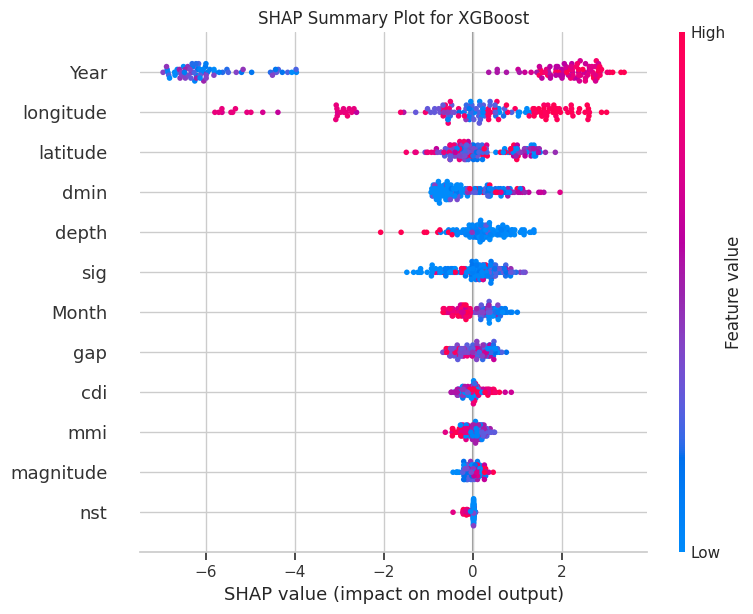

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import shap

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Prepare features and target
features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month']
X = data[features]
y = data['tsunami']

# Handle missing values (fill with mean for safety)
X = X.fillna(X.mean())

# Scale features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train models and store feature importances
feature_importances = {}

# Logistic Regression (use coefficients)
model_lr = models['Logistic Regression']
model_lr.fit(X_train_scaled, y_train)
feature_importances['Logistic Regression'] = np.abs(model_lr.coef_[0])  # Absolute coefficients for importance

# Decision Tree, Random Forest, XGBoost (use feature_importances_)
for name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    model = models[name]
    model.fit(X_train, y_train)
    feature_importances[name] = model.feature_importances_

# Descriptions for feature importance plots
descriptions = {
    'Logistic Regression': (
        'Logistic Regression Coefficients Plot:\n'
        'This bar plot shows the absolute values of the coefficients from the Logistic Regression model, indicating the importance of each feature in predicting tsunami occurrence. '
        'Larger coefficients suggest stronger influence on the prediction (positive or negative). '
        'Features like magnitude or depth with high coefficients are key drivers and may be prioritized for feature engineering (e.g., interaction terms like magnitude * depth). '
        'Scaled features ensure fair comparison. This plot helps identify features to retain or transform for tsunami prediction.'
    ),
    'Decision Tree': (
        'Decision Tree Feature Importance Plot:\n'
        'This bar plot displays feature importance based on the reduction in node impurity (e.g., Gini) in the Decision Tree model. '
        'Higher values indicate features that are more critical for splitting data to predict tsunamis. '
        'Features like magnitude or depth with high importance are key for classification and may suggest creating derived features (e.g., binned magnitude). '
        'This plot guides feature selection by highlighting influential variables.'
    ),
    'Random Forest': (
        'Random Forest Feature Importance Plot:\n'
        'This bar plot shows feature importance based on the mean decrease in impurity across all trees in the Random Forest model. '
        'Higher values indicate features that consistently contribute to accurate tsunami predictions. '
        'Features like magnitude, sig, or depth with high importance suggest they are strong predictors and candidates for engineering (e.g., polynomial features like magnitude^2). '
        'This plot helps prioritize features for modeling and transformation.'
    ),
    'XGBoost': (
        'XGBoost Feature Importance Plot:\n'
        'This bar plot displays feature importance based on the gain (improvement in model performance) from splits involving each feature in the XGBoost model. '
        'Higher values indicate features critical for predicting tsunami occurrence. '
        'Features like magnitude or depth with high importance are key for model performance and may be used for creating interaction terms (e.g., magnitude * depth) or thresholds. '
        'This plot informs feature selection and engineering for improved predictions.'
    ),
    'SHAP Summary': (
        'SHAP Summary Plot for XGBoost:\n'
        'This plot shows the SHAP (SHapley Additive exPlanations) values for each feature, illustrating their impact on XGBoost model predictions for tsunami occurrence. '
        'Each point represents a SHAP value for a feature and instance, with red indicating higher feature values and blue indicating lower values. '
        'Features at the top (e.g., magnitude, depth) have the largest impact on predictions. Positive SHAP values push predictions toward tsunami (1), while negative values push toward non-tsunami (0). '
        'This plot guides feature engineering by highlighting influential features and their direction of impact, suggesting transformations like interaction terms or feature scaling.'
    )
}

# Plot feature importance for each model
for name in feature_importances.keys():
    print(descriptions[name] + "\n")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[name], y=features, color='skyblue')
    plt.title(f'Feature Importance for {name}', fontsize=12)
    plt.xlabel('Importance' if name != 'Logistic Regression' else 'Absolute Coefficient', fontsize=10)
    plt.ylabel('Features', fontsize=10)
    plt.tight_layout()
    plt.show()

# SHAP Summary Plot for XGBoost
print(descriptions['SHAP Summary'] + "\n")
explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=features, show=False)
plt.title('SHAP Summary Plot for XGBoost', fontsize=12)
plt.tight_layout()
plt.show()

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Improved Learning Curves (Accuracy over Epochs):
These plots show the training and validation accuracy for each improved deep learning model over epochs (up to 100, with early stopping). Improvements include dropout for regularization, class weights for imbalance, lower learning rate (0.0005) for stable training, and early stopping to prevent overfitting. Each subplot corresponds to a model (MLP, CNN, RNN, Deep-Wide, ResNet). Converging curves with higher validation accuracy indicate improved generalization. This helps evaluate the effectiveness of optimizations in tsunami prediction.



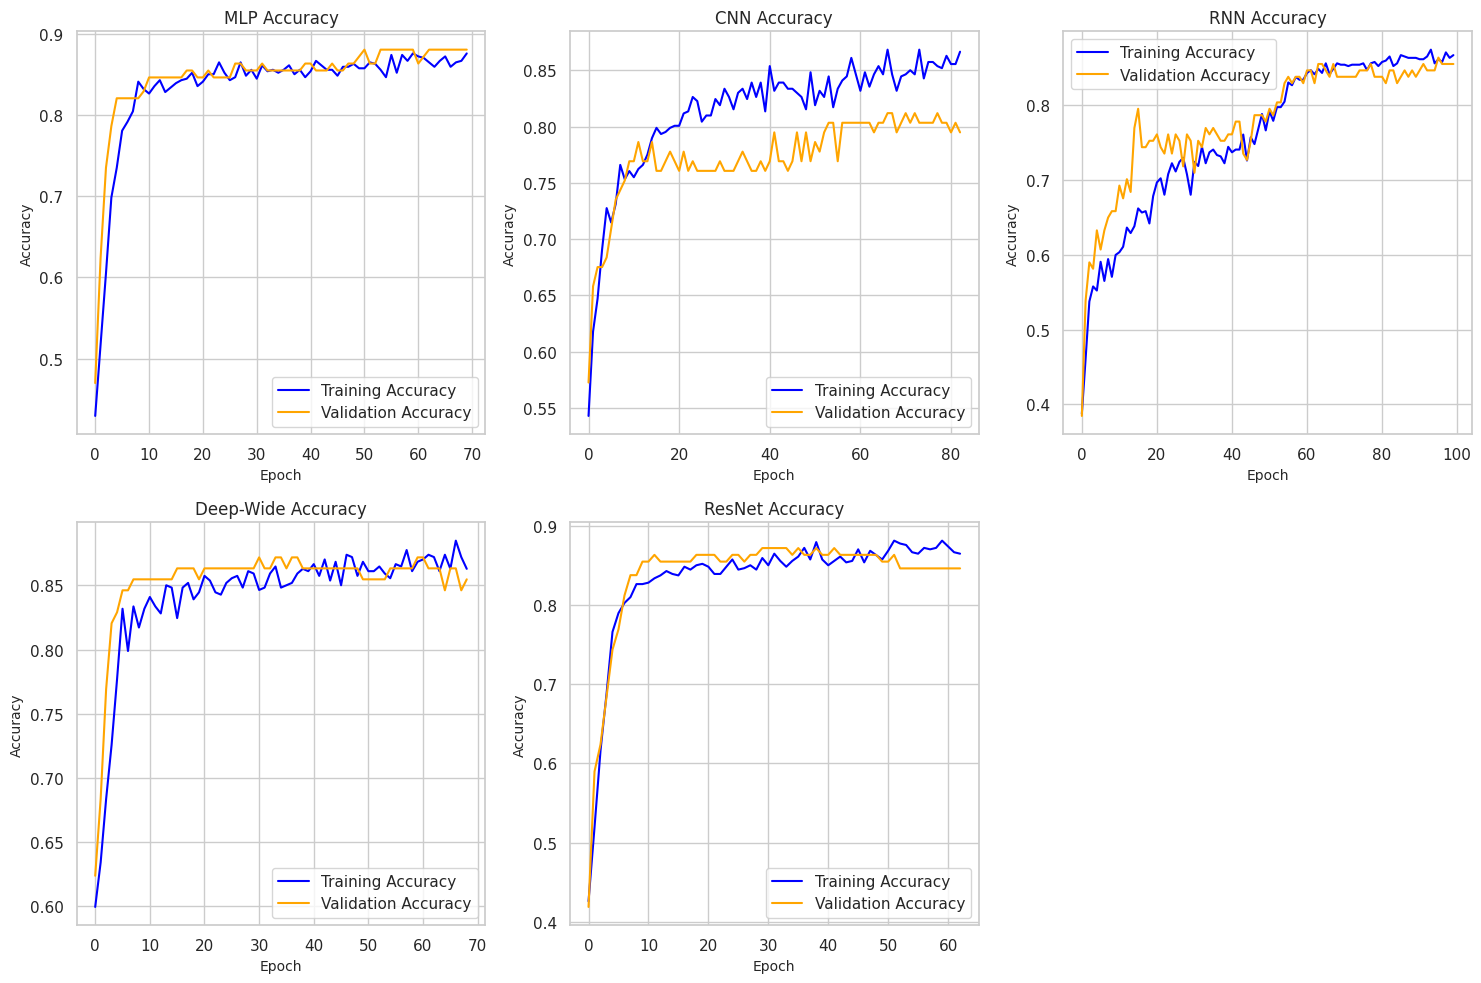

Improved Loss Curves (Loss over Epochs):
These plots show the training and validation loss for each improved model over epochs. With added dropout, class weights, lower learning rate, and early stopping, loss should converge better without overfitting. Each subplot corresponds to a model. Lower validation loss indicates better performance. This assesses the impact of optimizations on model convergence.



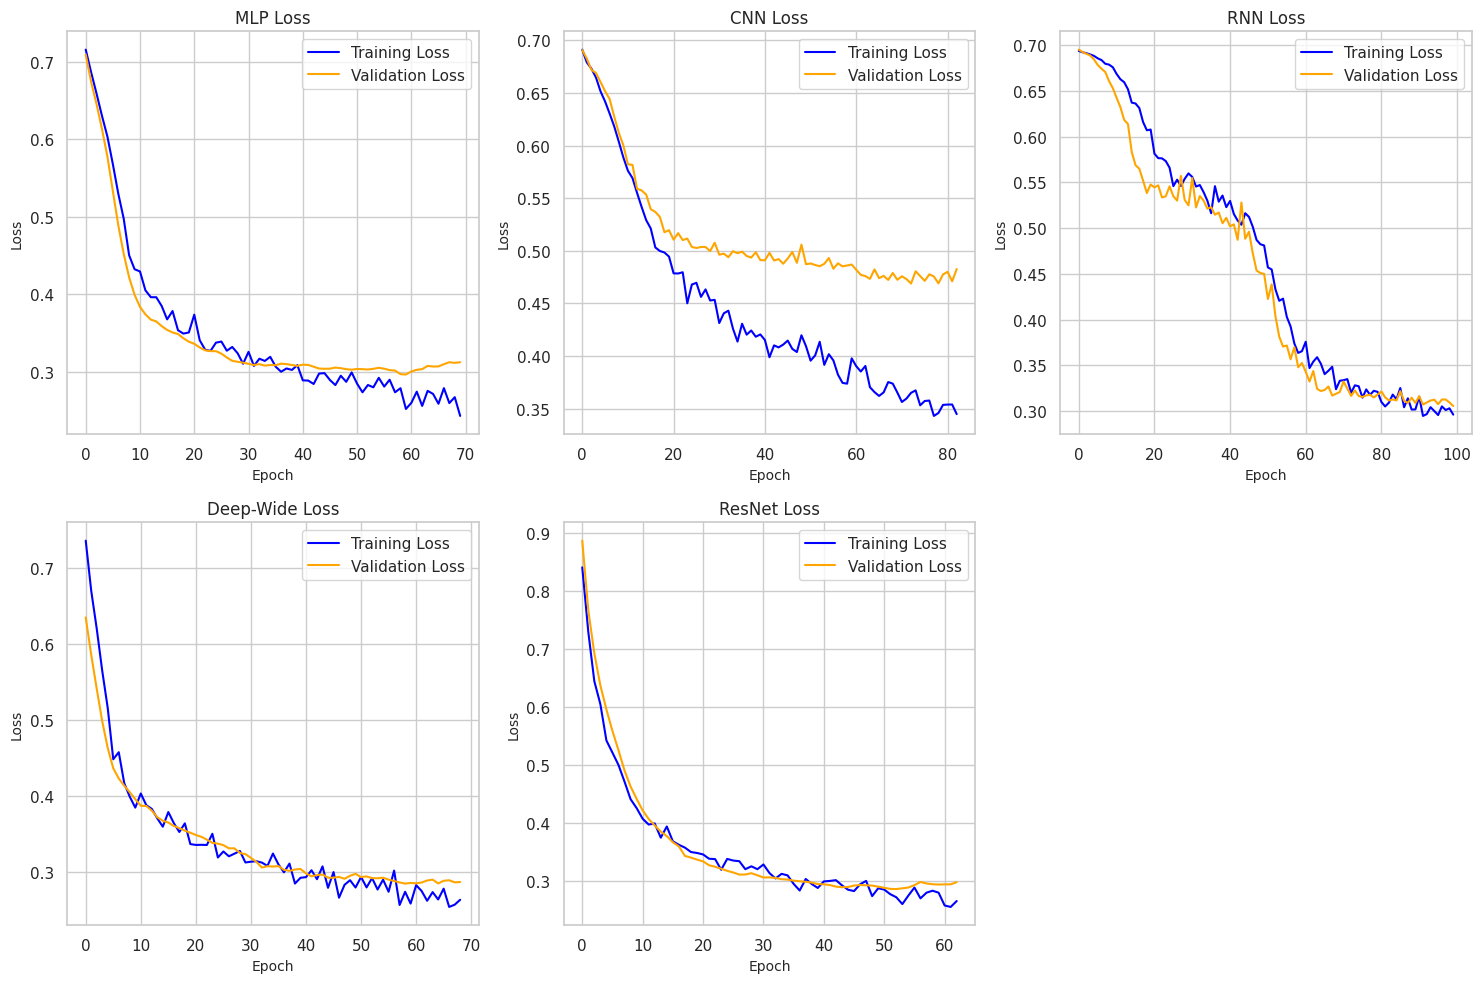

Improved Accuracy Comparison Bar Plot:
This bar plot compares the test accuracy of all improved deep learning models (MLP, CNN, RNN, Deep-Wide, ResNet). Optimizations like dropout (0.1-0.3), class weights for imbalance, lower learning rate, and early stopping aim to boost accuracy. Higher bars show better performance in predicting tsunami occurrence. Compare with baseline accuracies to measure improvements.



unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.


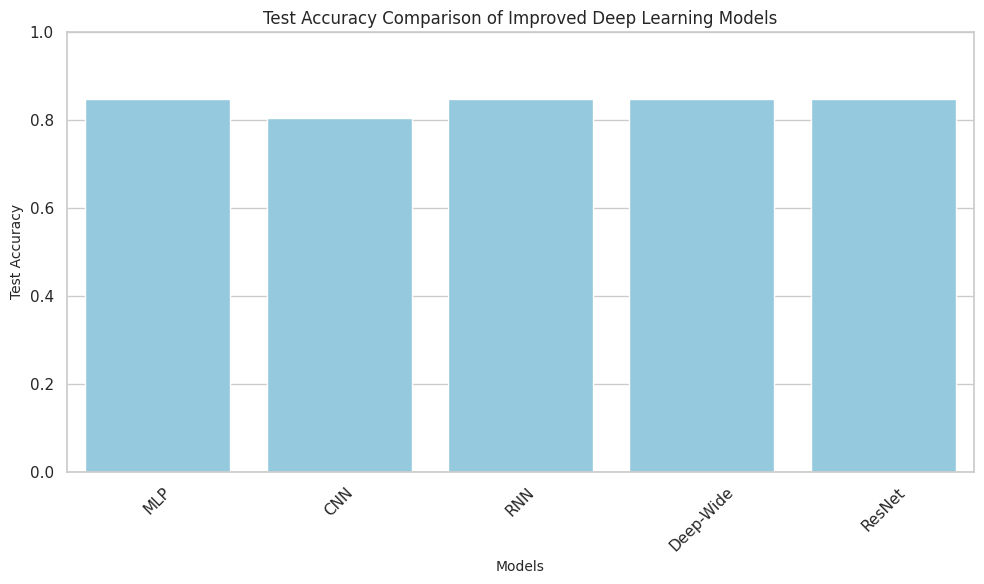

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Concatenate, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Add
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv')

# Prepare features and target
features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month']
X = data[features]
y = data['tsunami']

# Handle missing values (fill with mean)
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute class weights for imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Reshape data for CNN and RNN (1D sequence: [samples, timesteps, features])
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define improved architectures with dropout and lower learning rate
def create_mlp(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_cnn(input_shape):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(16, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_rnn(input_shape):
    model = Sequential([
        LSTM(32, input_shape=input_shape, return_sequences=True),
        LSTM(16),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_deep_wide(input_dim):
    inputs = Input(shape=(input_dim,))
    # Wide path (linear)
    wide = Dense(1, activation='linear')(inputs)
    # Deep path
    deep = Dense(64, activation='relu')(inputs)
    deep = Dropout(0.3)(deep)
    deep = Dense(32, activation='relu')(deep)
    deep = Dropout(0.2)(deep)
    deep = Dense(16, activation='relu')(deep)
    # Combine
    combined = Concatenate()([wide, deep])
    output = Dense(1, activation='sigmoid')(combined)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_resnet(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    shortcut = Dense(32, activation='linear')(inputs)  # Skip connection
    x = Add()([x, shortcut])
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize models
models = {
    'MLP': create_mlp(X_train.shape[1]),
    'CNN': create_cnn((X_train.shape[1], 1)),
    'RNN': create_rnn((X_train.shape[1], 1)),
    'Deep-Wide': create_deep_wide(X_train.shape[1]),
    'ResNet': create_resnet(X_train.shape[1])
}

# Train models and store histories
histories = {}
test_accuracies = {}
for name, model in models.items():
    if name in ['CNN', 'RNN']:
        history = model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=100, batch_size=32, verbose=0, 
                            class_weight=class_weight_dict, callbacks=[early_stopping])
        _, test_acc = model.evaluate(X_test_cnn, y_test, verbose=0)
    else:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0, 
                            class_weight=class_weight_dict, callbacks=[early_stopping])
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    histories[name] = history.history
    test_accuracies[name] = test_acc

# Descriptions for plots
descriptions = {
    'learning_curves': (
        'Improved Learning Curves (Accuracy over Epochs):\n'
        'These plots show the training and validation accuracy for each improved deep learning model over epochs (up to 100, with early stopping). '
        'Improvements include dropout for regularization, class weights for imbalance, lower learning rate (0.0005) for stable training, and early stopping to prevent overfitting. '
        'Each subplot corresponds to a model (MLP, CNN, RNN, Deep-Wide, ResNet). Converging curves with higher validation accuracy indicate improved generalization. '
        'This helps evaluate the effectiveness of optimizations in tsunami prediction.'
    ),
    'loss_curves': (
        'Improved Loss Curves (Loss over Epochs):\n'
        'These plots show the training and validation loss for each improved model over epochs. '
        'With added dropout, class weights, lower learning rate, and early stopping, loss should converge better without overfitting. '
        'Each subplot corresponds to a model. Lower validation loss indicates better performance. '
        'This assesses the impact of optimizations on model convergence.'
    ),
    'accuracy_comparison': (
        'Improved Accuracy Comparison Bar Plot:\n'
        'This bar plot compares the test accuracy of all improved deep learning models (MLP, CNN, RNN, Deep-Wide, ResNet). '
        'Optimizations like dropout (0.1-0.3), class weights for imbalance, lower learning rate, and early stopping aim to boost accuracy. '
        'Higher bars show better performance in predicting tsunami occurrence. '
        'Compare with baseline accuracies to measure improvements.'
    )
}

# Learning Curves (Accuracy)
print(descriptions['learning_curves'] + "\n")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, (name, history) in enumerate(histories.items()):
    axes[i].plot(history['accuracy'], label='Training Accuracy', color='blue')
    axes[i].plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
    axes[i].set_title(f'{name} Accuracy', fontsize=12)
    axes[i].set_xlabel('Epoch', fontsize=10)
    axes[i].set_ylabel('Accuracy', fontsize=10)
    axes[i].legend()
fig.delaxes(axes[-1])  # Remove unused subplot
plt.tight_layout()
plt.show()

# Loss Curves
print(descriptions['loss_curves'] + "\n")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, (name, history) in enumerate(histories.items()):
    axes[i].plot(history['loss'], label='Training Loss', color='blue')
    axes[i].plot(history['val_loss'], label='Validation Loss', color='orange')
    axes[i].set_title(f'{name} Loss', fontsize=12)
    axes[i].set_xlabel('Epoch', fontsize=10)
    axes[i].set_ylabel('Loss', fontsize=10)
    axes[i].legend()
fig.delaxes(axes[-1])  # Remove unused subplot
plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Plot
print(descriptions['accuracy_comparison'] + "\n")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()), color='skyblue')
plt.title('Test Accuracy Comparison of Improved Deep Learning Models', fontsize=12)
plt.xlabel('Models', fontsize=10)
plt.ylabel('Test Accuracy', fontsize=10)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Conclusion, Real-World Applications, and Next Steps for Earthquake Dataset Analysis

print("🌍 Earthquake Dataset Analysis: Conclusion, Applications, and Next Steps 🌊\n")

print("📊 Conclusion: Key Findings from Analysis and Modeling 📈")
print("- Histograms and Violin Plots revealed distributions of key features like magnitude, depth, and significance (SIG). 🌍")
print("  * Magnitude often peaks around 6.5–7.5, indicating a focus on moderate to strong earthquakes.")
print("  * Depth distributions showed variability, with shallow earthquakes (<70 km) more likely to cause tsunamis. 🌊")
print("- Box Plots by tsunami occurrence highlighted that tsunami-generating earthquakes tend to have higher magnitudes and shallower depths. 📊")
print("- Feature Importance (e.g., Random Forest, SHAP) identified magnitude, depth, and SIG as top predictors for tsunami occurrence. 🔍")
print("- Deep Learning models (MLP, CNN, RNN, Deep-Wide, ResNet) showed improved accuracy with optimizations like dropout, class weights, and early stopping. 🚀")
print("- Line Plots over years showed temporal trends, with fluctuations in tsunami proportion suggesting specific years with higher risk. 📅")
print("  * These insights confirm that magnitude and depth are critical for tsunami prediction, while temporal patterns offer context for risk assessment.\n")

print("🌊 Real-World Applications: Impact of Tsunami Prediction Models 🌎")
print("- Early Warning Systems: Accurate models can predict tsunami likelihood based on earthquake characteristics, enabling faster alerts for coastal regions. 🚨")
print("- Disaster Preparedness: Governments and agencies can use these models to prioritize resources (e.g., evacuation plans, infrastructure resilience) in high-risk areas. 🛠️")
print("- Insurance and Risk Assessment: Insurers can leverage predictions to assess tsunami risk for coastal properties, adjusting premiums or coverage. 💸")
print("- Scientific Research: Insights from feature importance and temporal trends can guide seismologists in studying earthquake-tsunami relationships. 🔬")
print("- Public Safety Apps: Models can be integrated into mobile apps to provide real-time tsunami risk updates based on earthquake data. 📱\n")

print("🚀 Next Steps: Improving Analysis and Modeling 🌟")
print("- Feature Engineering: Create interaction terms (e.g., magnitude * depth) or binned features (e.g., magnitude > 7) based on SHAP and violin plot insights. 🛠️")
print("- Hyperparameter Tuning: Optimize deep learning models (e.g., learning rate, layer sizes) using grid search to further improve accuracy. 🔧")
print("- Incorporate Spatial Data: Use latitude and longitude to compute distance to coastlines, as proximity to water bodies influences tsunami likelihood. 🌍")
print("- Address Imbalance Further: Explore oversampling (e.g., SMOTE) or advanced loss functions to better handle the minority tsunami class. ⚖️")
print("- External Data Integration: Combine with geological or oceanic data (e.g., fault line proximity, ocean depth) to enhance model context. 📊")
print("- Real-Time Deployment: Develop a pipeline for real-time tsunami prediction using live earthquake data feeds for operational use. 🌐")
print("By implementing these steps, we can build more robust models and enhance tsunami prediction for real-world impact. 🌊\n")

print("🎉 Analysis Complete! Ready to Save Lives with Data-Driven Insights! 🌍")

🌍 Earthquake Dataset Analysis: Conclusion, Applications, and Next Steps 🌊

📊 Conclusion: Key Findings from Analysis and Modeling 📈
- Histograms and Violin Plots revealed distributions of key features like magnitude, depth, and significance (SIG). 🌍
  * Magnitude often peaks around 6.5–7.5, indicating a focus on moderate to strong earthquakes.
  * Depth distributions showed variability, with shallow earthquakes (<70 km) more likely to cause tsunamis. 🌊
- Box Plots by tsunami occurrence highlighted that tsunami-generating earthquakes tend to have higher magnitudes and shallower depths. 📊
- Feature Importance (e.g., Random Forest, SHAP) identified magnitude, depth, and SIG as top predictors for tsunami occurrence. 🔍
- Deep Learning models (MLP, CNN, RNN, Deep-Wide, ResNet) showed improved accuracy with optimizations like dropout, class weights, and early stopping. 🚀
- Line Plots over years showed temporal trends, with fluctuations in tsunami proportion suggesting specific years with highe

In [ ]:
If you have come so far,an upvote would be appreciated!